## Intensivnutzung sozialer Medien

### Datenimport und -bereinigung

In [146]:
import pandas as pd 

In [147]:
import os
print(os.getcwd())

/Users/larapolat/Documents/GitHub/python_kurs


In [148]:
df_intensiv = pd.read_csv('data/Datensatz_Intensivnutzung.csv', sep=';', encoding='latin1')

In [149]:
df_intensiv.head(5)

,za_nr,version,doi,lfdn,SC1,SC2_1,SC2_2,SC2_3,SC2_4,SC2_5,SC2_6,SC2_7,SC2_8,SC2_9,SC2_10,SC2_11,SC2_99,SC3_1,SC3_2,SC3_3,SC3_4,SC3_5,SC3_6,SC3_7,SC3_8,SC3_9,SC3_10,SC3_11,Q1_1,Q1_2,Q1_3,Q1_4,Q1_5,Q1_6,Q1_7,Q1_8,Q1_9,Q1_10,Q1_11,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q2_8,Q2_9,Q2_10,Q2_11,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q4,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q5_6,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7,Q7_8,Q7_9,Q7_10,Q7_11,Q7_12,Q7_13,Q8,Q9,Q10_1,Q10_2,Q10_3,Q10_4,Q10_5,Q11,Q12,Q13,Q14_1,Q14_2,Q14_3,Q14_4,Q14_5,Q14_6,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q16_1,Q16_2,Q16_3,Q16_4,Q16_5,Q17,Q18,Q19,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,Q20_7,Q20_8,Q20_9,Q20_10,Q21,Q22,Q23_1,Q23_2,Q23_3,Q23_4,Q23_5,Q23_6,Q23_7,Q23_8,Q23_9,Q23_10,Q23_11,Q23_12,Q23_13,Q23_14,Q24_1,Q24_2,Q24_3,Q24_4,Q24_5,Q24_6,Q24_7,Q24_8,Q24_9,Q24_10,Q24_11,Q24_12,Q24_13,Q24_14,Q25_1,Q25_2,Q25_3,Q25_4,Q25_5,Q25_6,Q25_7,Q25_8,Q26,Q27,Q28,Q29,S1,S2,S3,S4,S5,S6,S7,S8,S9,FAKTdly
0,6720,1.0.0 (2019-03-29),doi:10.4232/1.13221,10371,Mehrmals täglich,quoted,quoted,quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,quoted,not quoted,quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,Smartphone,Smartphone,,,,,,,,,Smartphone,Trifft eher nicht zu,Trifft überhaupt nicht zu,Trifft eher nicht zu,Trifft überhaupt nicht zu,Trifft überhaupt nicht zu,Trifft eher nicht zu,Trifft überhaupt nicht zu,Trifft eher zu,Trifft eher zu,Trifft überhaupt nicht zu,Trifft eher zu,3,Ich halte die meisten Informationen in soziale...,4,3,Ich könnte sehr gut ohne soziale Netzwerke aus...,3,Nie,Nie,Selten,Nie,Selten,Gelegentlich,Nutze ich nie,Nutze ich nie,Nutze ich nie,Nutze ich nur selten,Nutze ich nie,Nutze ich gelegentlich,Nutze ich gelegentlich,Nutze ich nie,Nutze ich nie,Stimme eher zu,Stimme eher nicht zu,Stimme voll und ganz zu,Stimme eher nicht zu,Stimme eher nicht zu,Stimme eher zu,Stimme eher nicht zu,Stimme eher zu,Stimme überhaupt nicht zu,Stimme eher zu,Stimme eher nicht zu,Stimme eher nicht zu,Stimme überhaupt nicht zu,Nie,Nie,Wenige,Gar keine,Gar keine,Wenige,Gar keine,6 politische Beiträge in meinen SN nerven mich,Ich blockiere die Absender der Beiträge.,Werden automatisch angezeigt,weniger respektvoll,5,weniger emotional,politisch weniger korrekt,spiegeln eher weniger wichtige politische Deba...,weniger interessant,"Überwiegend Personen, die ich persönlich nicht...",Weiß nicht,Etwa gleich viel von beidem,"Überwiegend Personen, die ich persönlich nicht...",Weiß nicht,Eher unterschiedliche politische Ansichten wie...,Etwa zu gleichen Teilen ähnliche und unterschi...,Weiß nicht,Weiß nicht,Etwa zu gleichen Teilen ähnliche und unterschi...,Ich ignoriere den Post.,Nein,,,,,,,,,,,,Ja,Gut,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Weniger wichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,"Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie",Kenne ich nicht,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,Gut,Gar nicht zufrieden,Nicht so gute Regierungsform,Überhaupt nicht,Männlich,37 Jahre,1 Person,Mittlere Reife oder Abschluss der polytechnisc...,Voll-/Teilzeiterwerbstätig (auch Mini-Jobs),Angestellte/r,Berlin,500.000 oder mehr Einwohner,Keine Angabe,"0,857"
1,6720,1.0.0 (2019-03-29),doi:10.4232/1.13221,10372,Mehrmals täglich,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quo

In [150]:
pd.set_option('display.max_columns', None)  # zeigt alle Spalten
# pd.set_option('display.expand_frame_repr', False)
df_intensiv.head(5)

,za_nr,version,doi,lfdn,SC1,SC2_1,SC2_2,SC2_3,SC2_4,SC2_5,SC2_6,SC2_7,SC2_8,SC2_9,SC2_10,SC2_11,SC2_99,SC3_1,SC3_2,SC3_3,SC3_4,SC3_5,SC3_6,SC3_7,SC3_8,SC3_9,SC3_10,SC3_11,Q1_1,Q1_2,Q1_3,Q1_4,Q1_5,Q1_6,Q1_7,Q1_8,Q1_9,Q1_10,Q1_11,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q2_8,Q2_9,Q2_10,Q2_11,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q4,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q5_6,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7,Q7_8,Q7_9,Q7_10,Q7_11,Q7_12,Q7_13,Q8,Q9,Q10_1,Q10_2,Q10_3,Q10_4,Q10_5,Q11,Q12,Q13,Q14_1,Q14_2,Q14_3,Q14_4,Q14_5,Q14_6,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q16_1,Q16_2,Q16_3,Q16_4,Q16_5,Q17,Q18,Q19,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,Q20_7,Q20_8,Q20_9,Q20_10,Q21,Q22,Q23_1,Q23_2,Q23_3,Q23_4,Q23_5,Q23_6,Q23_7,Q23_8,Q23_9,Q23_10,Q23_11,Q23_12,Q23_13,Q23_14,Q24_1,Q24_2,Q24_3,Q24_4,Q24_5,Q24_6,Q24_7,Q24_8,Q24_9,Q24_10,Q24_11,Q24_12,Q24_13,Q24_14,Q25_1,Q25_2,Q25_3,Q25_4,Q25_5,Q25_6,Q25_7,Q25_8,Q26,Q27,Q28,Q29,S1,S2,S3,S4,S5,S6,S7,S8,S9,FAKTdly
0,6720,1.0.0 (2019-03-29),doi:10.4232/1.13221,10371,Mehrmals täglich,quoted,quoted,quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,quoted,not quoted,quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,Smartphone,Smartphone,,,,,,,,,Smartphone,Trifft eher nicht zu,Trifft überhaupt nicht zu,Trifft eher nicht zu,Trifft überhaupt nicht zu,Trifft überhaupt nicht zu,Trifft eher nicht zu,Trifft überhaupt nicht zu,Trifft eher zu,Trifft eher zu,Trifft überhaupt nicht zu,Trifft eher zu,3,Ich halte die meisten Informationen in soziale...,4,3,Ich könnte sehr gut ohne soziale Netzwerke aus...,3,Nie,Nie,Selten,Nie,Selten,Gelegentlich,Nutze ich nie,Nutze ich nie,Nutze ich nie,Nutze ich nur selten,Nutze ich nie,Nutze ich gelegentlich,Nutze ich gelegentlich,Nutze ich nie,Nutze ich nie,Stimme eher zu,Stimme eher nicht zu,Stimme voll und ganz zu,Stimme eher nicht zu,Stimme eher nicht zu,Stimme eher zu,Stimme eher nicht zu,Stimme eher zu,Stimme überhaupt nicht zu,Stimme eher zu,Stimme eher nicht zu,Stimme eher nicht zu,Stimme überhaupt nicht zu,Nie,Nie,Wenige,Gar keine,Gar keine,Wenige,Gar keine,6 politische Beiträge in meinen SN nerven mich,Ich blockiere die Absender der Beiträge.,Werden automatisch angezeigt,weniger respektvoll,5,weniger emotional,politisch weniger korrekt,spiegeln eher weniger wichtige politische Deba...,weniger interessant,"Überwiegend Personen, die ich persönlich nicht...",Weiß nicht,Etwa gleich viel von beidem,"Überwiegend Personen, die ich persönlich nicht...",Weiß nicht,Eher unterschiedliche politische Ansichten wie...,Etwa zu gleichen Teilen ähnliche und unterschi...,Weiß nicht,Weiß nicht,Etwa zu gleichen Teilen ähnliche und unterschi...,Ich ignoriere den Post.,Nein,,,,,,,,,,,,Ja,Gut,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Weniger wichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,"Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie",Kenne ich nicht,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,Gut,Gar nicht zufrieden,Nicht so gute Regierungsform,Überhaupt nicht,Männlich,37 Jahre,1 Person,Mittlere Reife oder Abschluss der polytechnisc...,Voll-/Teilzeiterwerbstätig (auch Mini-Jobs),Angestellte/r,Berlin,500.000 oder mehr Einwohner,Keine Angabe,"0,857"
1,6720,1.0.0 (2019-03-29),doi:10.4232/1.13221,10372,Mehrmals täglich,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quo

In [151]:
df_intensiv.tail(8) #letzten Zeilen eines Datensatzes

,za_nr,version,doi,lfdn,SC1,SC2_1,SC2_2,SC2_3,SC2_4,SC2_5,SC2_6,SC2_7,SC2_8,SC2_9,SC2_10,SC2_11,SC2_99,SC3_1,SC3_2,SC3_3,SC3_4,SC3_5,SC3_6,SC3_7,SC3_8,SC3_9,SC3_10,SC3_11,Q1_1,Q1_2,Q1_3,Q1_4,Q1_5,Q1_6,Q1_7,Q1_8,Q1_9,Q1_10,Q1_11,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q2_8,Q2_9,Q2_10,Q2_11,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q4,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q5_6,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7,Q7_8,Q7_9,Q7_10,Q7_11,Q7_12,Q7_13,Q8,Q9,Q10_1,Q10_2,Q10_3,Q10_4,Q10_5,Q11,Q12,Q13,Q14_1,Q14_2,Q14_3,Q14_4,Q14_5,Q14_6,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q16_1,Q16_2,Q16_3,Q16_4,Q16_5,Q17,Q18,Q19,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,Q20_7,Q20_8,Q20_9,Q20_10,Q21,Q22,Q23_1,Q23_2,Q23_3,Q23_4,Q23_5,Q23_6,Q23_7,Q23_8,Q23_9,Q23_10,Q23_11,Q23_12,Q23_13,Q23_14,Q24_1,Q24_2,Q24_3,Q24_4,Q24_5,Q24_6,Q24_7,Q24_8,Q24_9,Q24_10,Q24_11,Q24_12,Q24_13,Q24_14,Q25_1,Q25_2,Q25_3,Q25_4,Q25_5,Q25_6,Q25_7,Q25_8,Q26,Q27,Q28,Q29,S1,S2,S3,S4,S5,S6,S7,S8,S9,FAKTdly
1000,6720,1.0.0 (2019-03-29),doi:10.4232/1.13221,20588,(Fast) die ganze Zeit / ständig,not quoted,quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,quoted,,Smartphone,,,,,,,,Smartphone,Smartphone,Trifft voll und ganz zu,Trifft eher zu,Trifft überhaupt nicht zu,Trifft eher nicht zu,Trifft überhaupt nicht zu,Trifft eher nicht zu,Trifft voll und ganz zu,Trifft überhaupt nicht zu,Trifft überhaupt nicht zu,Trifft voll und ganz zu,Trifft voll und ganz zu,Ich verbringe gerne viel Zeit in sozialen Netz...,4,3,Weiß nicht,Ich könnte ohne soziale Netzwerke nicht leben,4,Gelegentlich,Häufig,Selten,Nie,Selten,Selten,Nutze ich nur selten,Nutze ich nie,Nutze ich nur selten,Nutze ich nie,Nutze ich nur selten,Nutze ich nie,Nutze ich nur selten,Nutze ich nie,Nutze ich nie,Weiß nicht,Stimme überhaupt nicht zu,Stimme voll und ganz zu,Stimme eher zu,Stimme eher nicht zu,Stimme eher zu,Stimme überhaupt nicht zu,Stimme eher zu,Stimme überhaupt nicht zu,Stimme voll und ganz zu,Stimme überhaupt nicht zu,Stimme eher zu,Stimme eher zu,Selten,Nie,Wenige,Gar keine,Wenige,Wenige,Gar keine,4,,Werden automatisch angezeigt,weniger respektvoll,3,4,politisch weniger korrekt,5,2,Etwa gleich viel von beidem,"Überwiegend Personen, die ich persönlich nicht...","Überwiegend Personen, die ich persönlich nicht...","Überwiegend Personen, die ich persönlich nicht...","Überwiegend Personen, die ich persönlich kenne",Weiß nicht,Weiß nicht,Weiß nicht,Weiß nicht,Etwa zu gleichen Teilen ähnliche und unterschi...,Ich ignoriere den Post.,Nein,,,,,,,,,,,,Ja,Weniger gut,Wichtig,Weniger wichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Weniger wichtig,Weniger wichtig,Unwichtig,Unwichtig,Weniger wichtig,Weniger wichtig,"Kenne ich zwar, nutze ich aber nie",Kenne ich nicht,Kenne ich nicht,Nutze ich selten,Nutze ich selten,"Kenne ich zwar, nutze ich aber nie",Kenne ich nicht,Kenne ich nicht,"Kenne ich zwar, nutze ich aber nie",Kenne ich nicht,"Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie",not quoted,not quoted,not quoted,quoted,quoted,quoted,not quoted,not quoted,Gut,Zufrieden,Gute Regierungsform,Weiß nicht,Weiblich,16 Jahre,4 Personen,Noch in Schulausbildung mit Abschlussziel Hoch...,Schüler/in,,Niedersachsen,50.000 bis unter 100.000 Einwohner,5.000 EURO und mehr,"2,483"
1001,6720,1.0.0 (2019-03-29),doi:10.4232/1.13221,20589,(Fast) die ganze Zeit / ständig,not quoted,quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,,Smartphone,,Stationärer PC,,,,,,,Smartphone,Trifft voll und ganz zu,Trifft eher zu,Trifft eher zu,Trifft eher zu,Trifft eher zu,Trifft voll und ganz zu,Trifft eher zu,Trifft überhaupt nicht zu,

In [152]:
df_intensiv.shape

(1008, 175)

In [153]:
df_intensiv.dtypes

za_nr       int64
version    object
doi        object
lfdn        int64
SC1        object
SC2_1      object
SC2_2      object
SC2_3      object
SC2_4      object
SC2_5      object
SC2_6      object
SC2_7      object
SC2_8      object
SC2_9      object
SC2_10     object
SC2_11     object
SC2_99     object
SC3_1      object
SC3_2      object
SC3_3      object
SC3_4      object
SC3_5      object
SC3_6      object
SC3_7      object
SC3_8      object
SC3_9      object
SC3_10     object
SC3_11     object
Q1_1       object
Q1_2       object
Q1_3       object
Q1_4       object
Q1_5       object
Q1_6       object
Q1_7       object
Q1_8       object
Q1_9       object
Q1_10      object
Q1_11      object
Q2_1       object
Q2_2       object
Q2_3       object
Q2_4       object
Q2_5       object
Q2_6       object
Q2_7       object
Q2_8       object
Q2_9       object
Q2_10      object
Q2_11      object
Q3_1       object
Q3_2       object
Q3_3       object
Q3_4       object
Q3_5       object
Q4        

In [154]:
df_intensiv.iloc[3,:]

za_nr                                                   6720
version                                   1.0.0 (2019-03-29)
doi                                      doi:10.4232/1.13221
lfdn                                                   10375
SC1                                      Etwa einmal täglich
SC2_1                                                 quoted
SC2_2                                             not quoted
SC2_3                                             not quoted
SC2_4                                             not quoted
SC2_5                                             not quoted
SC2_6                                             not quoted
SC2_7                                             not quoted
SC2_8                                             not quoted
SC2_9                                             not quoted
SC2_10                                            not quoted
SC2_11                                            not quoted
SC2_99                  

In [155]:
df_intensiv.loc[df_intensiv["S7"].str.contains("Saarland"), :]

,za_nr,version,doi,lfdn,SC1,SC2_1,SC2_2,SC2_3,SC2_4,SC2_5,SC2_6,SC2_7,SC2_8,SC2_9,SC2_10,SC2_11,SC2_99,SC3_1,SC3_2,SC3_3,SC3_4,SC3_5,SC3_6,SC3_7,SC3_8,SC3_9,SC3_10,SC3_11,Q1_1,Q1_2,Q1_3,Q1_4,Q1_5,Q1_6,Q1_7,Q1_8,Q1_9,Q1_10,Q1_11,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q2_8,Q2_9,Q2_10,Q2_11,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q4,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q5_6,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7,Q7_8,Q7_9,Q7_10,Q7_11,Q7_12,Q7_13,Q8,Q9,Q10_1,Q10_2,Q10_3,Q10_4,Q10_5,Q11,Q12,Q13,Q14_1,Q14_2,Q14_3,Q14_4,Q14_5,Q14_6,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q16_1,Q16_2,Q16_3,Q16_4,Q16_5,Q17,Q18,Q19,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,Q20_7,Q20_8,Q20_9,Q20_10,Q21,Q22,Q23_1,Q23_2,Q23_3,Q23_4,Q23_5,Q23_6,Q23_7,Q23_8,Q23_9,Q23_10,Q23_11,Q23_12,Q23_13,Q23_14,Q24_1,Q24_2,Q24_3,Q24_4,Q24_5,Q24_6,Q24_7,Q24_8,Q24_9,Q24_10,Q24_11,Q24_12,Q24_13,Q24_14,Q25_1,Q25_2,Q25_3,Q25_4,Q25_5,Q25_6,Q25_7,Q25_8,Q26,Q27,Q28,Q29,S1,S2,S3,S4,S5,S6,S7,S8,S9,FAKTdly
118,6720,1.0.0 (2019-03-29),doi:10.4232/1.13221,10637,(Fast) die ganze Zeit / ständig,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,Stationärer PC,,,,,,,,,,,Trifft eher zu,Trifft eher zu,Trifft eher zu,Trifft eher zu,Trifft eher nicht zu,Trifft eher zu,Trifft überhaupt nicht zu,Trifft eher zu,Trifft eher zu,Trifft eher nicht zu,Trifft eher zu,2,4,4,3,5,3,Selten,Gelegentlich,Gelegentlich,Selten,Nie,Häufig,Nutze ich häufig,Nutze ich häufig,Nutze ich häufig,Nutze ich nur selten,Nutze ich nie,Nutze ich nur selten,Nutze ich häufig,Nutze ich nie,Nutze ich nur selten,Stimme überhaupt nicht zu,Stimme eher nicht zu,Stimme eher zu,Stimme eher nicht zu,Stimme voll und ganz zu,Stimme eher zu,Stimme eher zu,Stimme eher zu,Stimme überhaupt nicht zu,Stimme voll und ganz zu,Stimme eher nicht zu,Stimme voll und ganz zu,Stimme eher nicht zu,Selten,Nie,Viele,Wenige,Sehr viele,Wenige,Wenige,2,,Werden automatisch angezeigt,weniger respektvoll,5,emotionaler,5,5,3,"Überwiegend Personen, die ich persönlich nicht...","Überwiegend Personen, die ich persönlich nicht...","Überwiegend Personen, die ich persönlich nicht...","Überwiegend Personen, die ich persönlich nicht...","Überwiegend Personen, die ich persönlich nicht...",Etwa zu gleichen Teilen ähnliche und unterschi...,Etwa zu gleichen Teilen ähnliche und unterschi...,Eher unterschiedliche politische Ansichten wie...,Weiß nicht,Weiß nicht,Ich ignoriere den Post.,Ja,Sowohl als auch,quoted,not quoted,not quoted,quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,Ja,Sehr gut,Sehr wichtig,Wichtig,Wichtig,Weniger wichtig,Unwichtig,Sehr wichtig,Sehr wichtig,Sehr wichtig,Sehr wichtig,Unwichtig,Sehr wichtig,Sehr wichtig,Sehr wichtig,Unwichtig,Nutze ich selten,Nutze ich gelegentlich,Nutze ich gelegentlich,Nutze ich häufig,Kenne ich nicht,Nutze ich selten,Nutze ich häufig,Nutze ich häufig,Nutze ich gelegentlich,Kenne ich nicht,Kenne ich nicht,Nutze ich gelegentlich,Kenne ich nicht,Kenne ich nicht,quoted,quoted,quoted,quoted,not quoted,not quoted,not quoted,not quoted,Schlecht,Weniger zufrieden,Gute Regierungsform,Stark,Männlich,51 Jahre,4 Personen,Haupt- oder Volksschul-Abschluss,Arbeitslos (ohne Ein-Euro-Job),,Saarland,20.000 bis unter 50.000 Einwohner,1.500 bis unter 2.000 EURO,"1,025"
180,6720,1.0.0 (2019-03-29),doi:10.4232/1.13221,10799,Mehrmals täglich,quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,Smartphone,Smartphone,,,,,,,,,Smartphone,Trifft voll und ganz zu,Trifft eher zu,Trifft voll und ganz zu,Trifft voll und ganz zu,Trifft eher nicht zu,Trifft eher zu,Trifft eher zu,Trifft voll und ganz zu,Trifft eher zu,Trifft voll und ganz zu,Trifft voll und ganz zu,2,5,Weiß nicht,2,2,

In [156]:
df_intensiv.dtypes

za_nr       int64
version    object
doi        object
lfdn        int64
SC1        object
SC2_1      object
SC2_2      object
SC2_3      object
SC2_4      object
SC2_5      object
SC2_6      object
SC2_7      object
SC2_8      object
SC2_9      object
SC2_10     object
SC2_11     object
SC2_99     object
SC3_1      object
SC3_2      object
SC3_3      object
SC3_4      object
SC3_5      object
SC3_6      object
SC3_7      object
SC3_8      object
SC3_9      object
SC3_10     object
SC3_11     object
Q1_1       object
Q1_2       object
Q1_3       object
Q1_4       object
Q1_5       object
Q1_6       object
Q1_7       object
Q1_8       object
Q1_9       object
Q1_10      object
Q1_11      object
Q2_1       object
Q2_2       object
Q2_3       object
Q2_4       object
Q2_5       object
Q2_6       object
Q2_7       object
Q2_8       object
Q2_9       object
Q2_10      object
Q2_11      object
Q3_1       object
Q3_2       object
Q3_3       object
Q3_4       object
Q3_5       object
Q4        

In [157]:
# alle Spalten anzeigen
pd.set_option('display.max_columns', None)

# falls nötig, auch alle Zeilen
pd.set_option('display.max_rows', None)

# jetzt nochmal anzeigen
print(df_intensiv.dtypes)

za_nr       int64
version    object
doi        object
lfdn        int64
SC1        object
SC2_1      object
SC2_2      object
SC2_3      object
SC2_4      object
SC2_5      object
SC2_6      object
SC2_7      object
SC2_8      object
SC2_9      object
SC2_10     object
SC2_11     object
SC2_99     object
SC3_1      object
SC3_2      object
SC3_3      object
SC3_4      object
SC3_5      object
SC3_6      object
SC3_7      object
SC3_8      object
SC3_9      object
SC3_10     object
SC3_11     object
Q1_1       object
Q1_2       object
Q1_3       object
Q1_4       object
Q1_5       object
Q1_6       object
Q1_7       object
Q1_8       object
Q1_9       object
Q1_10      object
Q1_11      object
Q2_1       object
Q2_2       object
Q2_3       object
Q2_4       object
Q2_5       object
Q2_6       object
Q2_7       object
Q2_8       object
Q2_9       object
Q2_10      object
Q2_11      object
Q3_1       object
Q3_2       object
Q3_3       object
Q3_4       object
Q3_5       object
Q4        

In [158]:
# Zahl extrahieren und als float speichern (oder int, je nach Bedarf)
df_intensiv["Alter_clean"] = df_intensiv["S2"].str.extract(r'(\d+)').astype(int)

#### Umbenennen der Spaltennamen von Q zu ABCDE

In [159]:

# Mapping alte Q*-Namen → neue Blockstruktur mit deutschen Labels
column_rename_map = {
    # A1: Geräte Social Media Nutzung
    "Q1_1": "A1_1",  # 5 Ausprägungen für Facebook (PC, Laptop, Tablet, Smartphone, Sonstiges)
    "Q1_2": "A1_2",  # 5 Ausprägungen für Instagram (PC, Laptop, Tablet, Smartphone, Sonstiges)
    "Q1_3": "A1_3",  # 5 Ausprägungen für Twitter (PC, Laptop, Tablet, Smartphone, Sonstiges)
    "Q1_4": "A1_4",  # 5 Ausprägungen für YouTube (PC, Laptop, Tablet, Smartphone, Sonstiges)
    "Q1_5": "A1_5",  # 5 Ausprägungen für Google+ (PC, Laptop, Tablet, Smartphone, Sonstiges)
    "Q1_6": "A1_6",  # 5 Ausprägungen für LinkedIn (PC, Laptop, Tablet, Smartphone, Sonstiges)
    "Q1_7": "A1_7",  # 5 Ausprägungen für Xing (PC, Laptop, Tablet, Smartphone, Sonstiges)
    "Q1_8": "A1_8",  # 5 Ausprägungen für Tumblr (PC, Laptop, Tablet, Smartphone, Sonstiges)
    "Q1_9": "A1_9",  # 5 Ausprägungen für Reddit (PC, Laptop, Tablet, Smartphone, Sonstiges)
    "Q1_10": "A1_10", # 5 Ausprägungen für Snapchat (PC, Laptop, Tablet, Smartphone, Sonstiges)
    "Q1_11": "A1_11",  # 5 Ausprägungen für WhatsApp (PC, Laptop, Tablet, Smartphone, Sonstiges)

    # A2: Art der Nutzung von Social Media - Likert-Skala
    "Q2_1": "A2_1",  # Freunde kontaktieren
    "Q2_2": "A2_2",  # Familie kontaktieren
    "Q2_3": "A2_3",  # Nachrichten lesen
    "Q2_4": "A2_4",  # Gleichgesinnte finden
    "Q2_5": "A2_5",  # Politische Diskussion
    "Q2_6": "A2_6",  # Neue Freunde/Bekannte finden
    "Q2_7": "A2_7",  # Freizeit organisieren
    "Q2_8": "A2_8",  # Promis folgen
    "Q2_9": "A2_9",  # Marken folgen
    "Q2_10": "A2_10",  # Berufliche Kontakte pflegen
    "Q2_11": "A2_11",  # Unterhaltung/Zeitvertreib

    # A3: Einstellungen zu sozialen Netzwerken
    "Q3_1": "A3_1",  # Ich verbringe gerne Zeit dort
    "Q3_2": "A3_2",  # Glaubwürdigkeit der Informationen
    "Q3_3": "A3_3",  # Soziale Kontakte enger/oberflächlicher
    "Q3_4": "A3_4",  # Informationsrelevanz vs. Kontrolle
    "Q3_5": "A3_5",  # Könnte ohne soziale Netzwerke leben

    # B4: Politisches Interesse - Likert-Skala (6 stufig)
    "Q4": "B4",  # Politisches Interesse allgemein

    # B5: Politische Touchpoints im Alltag
    "Q5_1": "B5_1",  # Arbeit / Schule / Uni
    "Q5_2": "B5_2",  # Gespräche mit Freunden / Familie
    "Q5_3": "B5_3",  # Soziale Netzwerke
    "Q5_4": "B5_4",  # Freizeit / Hobbies / Verein
    "Q5_5": "B5_5",  # Öffentliche Veranstaltungen
    "Q5_6": "B5_6",  # Medien (TV, Zeitung etc.)

    # B6: Mediennutzung zur politischen Information
    "Q6_1": "B6_1",  # TV-Nachrichtensendungen
    "Q6_2": "B6_2",  # Überregionale Tages-/Wochenzeitungen
    "Q6_3": "B6_3",  # Regionale Zeitungen
    "Q6_4": "B6_4",  # Nachrichtenportale im Internet
    "Q6_5": "B6_5",  # Radiosendungen & Podcasts
    "Q6_6": "B6_6",  # Nachrichten-Apps
    "Q6_7": "B6_7",  # Soziale Netzwerke
    "Q6_8": "B6_8",  # Politik-Blogs
    "Q6_9": "B6_9",  # E-Mail-Newsletter / Messenger

    # B7: Aussagen zu Politik in sozialen Netzwerken
    "Q7_1":  "B7_1",  # Exklusive Infos
    "Q7_2":  "B7_2",  # Meinungsbildung
    "Q7_3":  "B7_3",  # Misstrauen in Inhalte
    "Q7_4":  "B7_4",  # Einseitigkeit
    "Q7_5":  "B7_5",  # Informationsfunktion Regierung
    "Q7_6":  "B7_6",  # Erreichen uninteressierter Zielgruppen
    "Q7_7":  "B7_7",  # Austauschförderung
    "Q7_8":  "B7_8",  # Plattform für Parteien
    "Q7_9":  "B7_9",  # Politischer Druck
    "Q7_10": "B7_10", # Anonymität / soziale Hemmung
    "Q7_11": "B7_11", # Neue Stimmen
    "Q7_12": "B7_12", # Angst vor Kritik
    "Q7_13": "B7_13", # Kennenlernen von Kandidaten

    # C8: Interaktion mit politischen Aktivitäten anderer in sozialen Netzwerken
    "Q8": "C8",         # Wie oft liken, kommentieren, teilen Sie politische Beiträge anderer?

    # C9: Eigene politische Aktivitäten in sozialen Netzwerken
    "Q9": "C9",         # Wie oft posten Sie selbst etwas Politisches (Text, Bild, Link, Video)?

    # C10: Gesehene politische Inhalte in sozialen Netzwerken

    "Q10_1": "C10_1",   # Facebook – politische Inhalte gesehen
    "Q10_2": "C10_2",   # Instagram – politische Inhalte gesehen
    "Q10_3": "C10_3",   # Twitter – politische Inhalte gesehen
    "Q10_4": "C10_4",   # YouTube – politische Inhalte gesehen
    "Q10_5": "C10_5",   # WhatsApp – politische Inhalte gesehen

    # C11: Politik in sozialen Netzwerken (nur für Nutzer mit polit. Inhalten)
    "Q11": "C11",   # Einstellung zu politischen Inhalten
    
    # C12: Reaktionen bei zu vielen politischen Inhalten
    "Q12": "C12",   #Konsequenzen aus politischem Überangebot

    # C13: Push-/Pull-Logik bei Facebook
    "Q13": "C13",       # Politische Inhalte aktiv gesucht oder automatisch angezeigt

    # C14: Qualität politischer Diskussionen (Vergleich online/offline)
    "Q14_1": "C14_1",     # Diskussionen sind respektvoller
    "Q14_2": "C14_2",     # Diskussionen sind informativer
    "Q14_3": "C14_3",     # Diskussionen sind emotionaler
    "Q14_4": "C14_4",     # Diskussionen sind politisch korrekter
    "Q14_5": "C14_5",     # Spiegeln wichtige Debatten wider
    "Q14_6": "C14_6",     # Diskussionen sind interessanter

    # C15: Persönliche Bekanntheit von SN-Kontakten
    "Q15_1": "C15_1",     # Facebook – eher persönlich bekannt?
    "Q15_2": "C15_2",     # Instagram – eher persönlich bekannt?
    "Q15_3": "C15_3",     # Twitter – eher persönlich bekannt?
    "Q15_4": "C15_4",     # YouTube – eher persönlich bekannt?
    "Q15_5": "C15_5",     # WhatsApp – eher persönlich bekannt?

    # C16: Politische Ansichten von SN-Kontakten
    "Q16_1": "C16_1",     # Facebook – ähnliche oder andere Ansichten?
    "Q16_2": "C16_2",     # Instagram – ähnliche oder andere Ansichten?
    "Q16_3": "C16_3",     # Twitter – ähnliche oder andere Ansichten?
    "Q16_4": "C16_4",     # YouTube – ähnliche oder andere Ansichten?
    "Q16_5": "C16_5",     # WhatsApp – ähnliche oder andere Ansichten?

    # C17: Reaktionen auf unliebsame politische Posts von Freunden
    "Q17": "C17",     

    # C18: Folgen Sie Politikern/Parteien/Institutionen?
    "Q18": "C18",         # Ja / Nein / Weiß nicht

    # C19: Politische Meinung der Gefolgten
    "Q19": "C19",         # Eher gleiche / andere / gemischt

    
    # C20: Gründe für das Folgen politischer Akteure
    "Q20_1": "C20_1",     # Um verschiedene Ansichten zu sehen
    "Q20_2": "C20_2",     # Aus Unterhaltungsgründen
    "Q20_3": "C20_3",     # Um zu diskutieren
    "Q20_4": "C20_4",     # Um direkt informiert zu werden
    "Q20_5": "C20_5",     # Um auf Probleme hinzuweisen
    "Q20_6": "C20_6",     # Um Unterstützung zu zeigen
    "Q20_7": "C20_7",     # Um andere politische Lager zu sehen
    "Q20_8": "C20_8",     # Andere Gründe
    "Q20_9": "C20_9",     # Nichts davon
    "Q20_10": "C20_10",   # Weiß nicht

    # C21: Wahrnehmung von Hasskommentaren
    "Q21": "C21",         # Ja / Nein / Weiß nicht

    # C22: Einstellung zum Gesetz gegen Hasskommentare
    "Q22": "C22",         # Sehr gut / Gut / Weniger gut / Schlecht / Weiß nicht

    #Block D

    # D23: Wichtigkeit verschiedener Informationsformen der Bundesregierung
    "Q23_1":  "D23_1",    # Internetseiten der Bundesregierung
    "Q23_2":  "D23_2",    # Broschüren / Faltblätter
    "Q23_3":  "D23_3",    # Zeitungs-/Zeitschriftenanzeigen
    "Q23_4":  "D23_4",    # Plakate
    "Q23_5":  "D23_5",    # Kinospots
    "Q23_6":  "D23_6",    # Newsletter
    "Q23_7":  "D23_7",    # Beilagen in Zeitungen/Zeitschriften
    "Q23_8":  "D23_8",    # Persönliche Infos (Messen, Infotouren)
    "Q23_9":  "D23_9",    # Bürgertelefon
    "Q23_10": "D23_10",   # Twitter des Regierungssprechers
    "Q23_11": "D23_11",   # Facebook-Auftritt der Bundesregierung
    "Q23_12": "D23_12",   # Online-Anzeigen
    "Q23_13": "D23_13",   # YouTube-Kanal der Bundesregierung
    "Q23_14": "D23_14",   # Instagram-Beiträge der Bundeskanzlerin

    # D24: Nutzung dieser Informationsformen
    "Q24_1":  "D24_1",    # Internetseiten der Bundesregierung
    "Q24_2":  "D24_2",    # Broschüren / Faltblätter
    "Q24_3":  "D24_3",    # Zeitungs-/Zeitschriftenanzeigen
    "Q24_4":  "D24_4",    # Plakate
    "Q24_5":  "D24_5",    # Kinospots
    "Q24_6":  "D24_6",    # Newsletter
    "Q24_7":  "D24_7",    # Beilagen
    "Q24_8":  "D24_8",    # Messen / Infotouren
    "Q24_9":  "D24_9",    # Bürgertelefon
    "Q24_10": "D24_10",   # Online-Anzeigen
    "Q24_11": "D24_11",   # Twitter Regierungssprecher
    "Q24_12": "D24_12",   # Facebook-Auftritt Bundesregierung
    "Q24_13": "D24_13",   # YouTube-Kanal der Bundesregierung
    "Q24_14": "D24_14",   # Instagram-Beiträge Kanzlerin

    # D25: Erwartungen an die Bundesregierung in sozialen Netzwerken
    "Q25_1": "D25_1",     # Über aktuelle politische Ereignisse informieren
    "Q25_2": "D25_2",     # Über Gesetze / Entscheidungen informieren
    "Q25_3": "D25_3",     # Hintergrundinformationen liefern
    "Q25_4": "D25_4",     # Auf Fragen der Bürger eingehen
    "Q25_5": "D25_5",     # Persönliche Infos über Mitglieder / Kanzlerin
    "Q25_6": "D25_6",     # Politik unterhaltsam / ansprechend vermitteln
    "Q25_7": "D25_7",     # Nichts davon
    "Q25_8": "D25_8",     # Weiß nicht

    # E26–E29: Lebensumstände
    "Q26": "E26",   # Wirtschaftliche Lage
    "Q27": "E27",   # Demokratiezufriedenheit
    "Q28": "E28",   # Demokratie als Idee
    "Q29": "E29",   # Parteiidentifikation

    # Soziodemografie
    "S1": "S1",  # Geschlecht
    "S2": "S2",  # Alter
    "S3": "S3",  # Haushaltsgröße
    "S4": "S4",  # Bildung
    "S5": "S5",  # Erwerbstätigkeit
    "S6": "S6",  # Berufliche Stellung
    "S7": "S7",  # Bundesland
    "S8": "S8",  # Gemeindegröße
    "S9": "S9"   # Haushaltseinkommen
}

# Spalten umbenennen
df_renamed = df_intensiv.rename(columns=column_rename_map)

# Umbenannten Datensatz speichern
df_renamed.to_csv("data/Datensatz_Intensivnutzung_umbenannt.csv", index=False)


In [160]:
df_renamed.head(5)

,za_nr,version,doi,lfdn,SC1,SC2_1,SC2_2,SC2_3,SC2_4,SC2_5,SC2_6,SC2_7,SC2_8,SC2_9,SC2_10,SC2_11,SC2_99,SC3_1,SC3_2,SC3_3,SC3_4,SC3_5,SC3_6,SC3_7,SC3_8,SC3_9,SC3_10,SC3_11,A1_1,A1_2,A1_3,A1_4,A1_5,A1_6,A1_7,A1_8,A1_9,A1_10,A1_11,A2_1,A2_2,A2_3,A2_4,A2_5,A2_6,A2_7,A2_8,A2_9,A2_10,A2_11,A3_1,A3_2,A3_3,A3_4,A3_5,B4,B5_1,B5_2,B5_3,B5_4,B5_5,B5_6,B6_1,B6_2,B6_3,B6_4,B6_5,B6_6,B6_7,B6_8,B6_9,B7_1,B7_2,B7_3,B7_4,B7_5,B7_6,B7_7,B7_8,B7_9,B7_10,B7_11,B7_12,B7_13,C8,C9,C10_1,C10_2,C10_3,C10_4,C10_5,C11,C12,C13,C14_1,C14_2,C14_3,C14_4,C14_5,C14_6,C15_1,C15_2,C15_3,C15_4,C15_5,C16_1,C16_2,C16_3,C16_4,C16_5,C17,C18,C19,C20_1,C20_2,C20_3,C20_4,C20_5,C20_6,C20_7,C20_8,C20_9,C20_10,C21,C22,D23_1,D23_2,D23_3,D23_4,D23_5,D23_6,D23_7,D23_8,D23_9,D23_10,D23_11,D23_12,D23_13,D23_14,D24_1,D24_2,D24_3,D24_4,D24_5,D24_6,D24_7,D24_8,D24_9,D24_10,D24_11,D24_12,D24_13,D24_14,D25_1,D25_2,D25_3,D25_4,D25_5,D25_6,D25_7,D25_8,E26,E27,E28,E29,S1,S2,S3,S4,S5,S6,S7,S8,S9,FAKTdly,Alter_clean
0,6720,1.0.0 (2019-03-29),doi:10.4232/1.13221,10371,Mehrmals täglich,quoted,quoted,quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,quoted,not quoted,quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,Smartphone,Smartphone,,,,,,,,,Smartphone,Trifft eher nicht zu,Trifft überhaupt nicht zu,Trifft eher nicht zu,Trifft überhaupt nicht zu,Trifft überhaupt nicht zu,Trifft eher nicht zu,Trifft überhaupt nicht zu,Trifft eher zu,Trifft eher zu,Trifft überhaupt nicht zu,Trifft eher zu,3,Ich halte die meisten Informationen in soziale...,4,3,Ich könnte sehr gut ohne soziale Netzwerke aus...,3,Nie,Nie,Selten,Nie,Selten,Gelegentlich,Nutze ich nie,Nutze ich nie,Nutze ich nie,Nutze ich nur selten,Nutze ich nie,Nutze ich gelegentlich,Nutze ich gelegentlich,Nutze ich nie,Nutze ich nie,Stimme eher zu,Stimme eher nicht zu,Stimme voll und ganz zu,Stimme eher nicht zu,Stimme eher nicht zu,Stimme eher zu,Stimme eher nicht zu,Stimme eher zu,Stimme überhaupt nicht zu,Stimme eher zu,Stimme eher nicht zu,Stimme eher nicht zu,Stimme überhaupt nicht zu,Nie,Nie,Wenige,Gar keine,Gar keine,Wenige,Gar keine,6 politische Beiträge in meinen SN nerven mich,Ich blockiere die Absender der Beiträge.,Werden automatisch angezeigt,weniger respektvoll,5,weniger emotional,politisch weniger korrekt,spiegeln eher weniger wichtige politische Deba...,weniger interessant,"Überwiegend Personen, die ich persönlich nicht...",Weiß nicht,Etwa gleich viel von beidem,"Überwiegend Personen, die ich persönlich nicht...",Weiß nicht,Eher unterschiedliche politische Ansichten wie...,Etwa zu gleichen Teilen ähnliche und unterschi...,Weiß nicht,Weiß nicht,Etwa zu gleichen Teilen ähnliche und unterschi...,Ich ignoriere den Post.,Nein,,,,,,,,,,,,Ja,Gut,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Weniger wichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,"Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie",Kenne ich nicht,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,Gut,Gar nicht zufrieden,Nicht so gute Regierungsform,Überhaupt nicht,Männlich,37 Jahre,1 Person,Mittlere Reife oder Abschluss der polytechnisc...,Voll-/Teilzeiterwerbstätig (auch Mini-Jobs),Angestellte/r,Berlin,500.000 oder mehr Einwohner,Keine Angabe,"0,857",37
1,6720,1.0.0 (2019-03-29),doi:10.4232/1.13221,10372,Mehrmals täglich,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,quoted,not quoted,not quoted,not quoted,not

In [161]:
#Balkendiagramm für die absoluten Häufigkeiten von Geschlecht

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [162]:
df_renamed = pd.read_csv('data/Datensatz_Intensivnutzung_umbenannt.csv')

In [163]:
df_renamed.head(10)

,za_nr,version,doi,lfdn,SC1,SC2_1,SC2_2,SC2_3,SC2_4,SC2_5,SC2_6,SC2_7,SC2_8,SC2_9,SC2_10,SC2_11,SC2_99,SC3_1,SC3_2,SC3_3,SC3_4,SC3_5,SC3_6,SC3_7,SC3_8,SC3_9,SC3_10,SC3_11,A1_1,A1_2,A1_3,A1_4,A1_5,A1_6,A1_7,A1_8,A1_9,A1_10,A1_11,A2_1,A2_2,A2_3,A2_4,A2_5,A2_6,A2_7,A2_8,A2_9,A2_10,A2_11,A3_1,A3_2,A3_3,A3_4,A3_5,B4,B5_1,B5_2,B5_3,B5_4,B5_5,B5_6,B6_1,B6_2,B6_3,B6_4,B6_5,B6_6,B6_7,B6_8,B6_9,B7_1,B7_2,B7_3,B7_4,B7_5,B7_6,B7_7,B7_8,B7_9,B7_10,B7_11,B7_12,B7_13,C8,C9,C10_1,C10_2,C10_3,C10_4,C10_5,C11,C12,C13,C14_1,C14_2,C14_3,C14_4,C14_5,C14_6,C15_1,C15_2,C15_3,C15_4,C15_5,C16_1,C16_2,C16_3,C16_4,C16_5,C17,C18,C19,C20_1,C20_2,C20_3,C20_4,C20_5,C20_6,C20_7,C20_8,C20_9,C20_10,C21,C22,D23_1,D23_2,D23_3,D23_4,D23_5,D23_6,D23_7,D23_8,D23_9,D23_10,D23_11,D23_12,D23_13,D23_14,D24_1,D24_2,D24_3,D24_4,D24_5,D24_6,D24_7,D24_8,D24_9,D24_10,D24_11,D24_12,D24_13,D24_14,D25_1,D25_2,D25_3,D25_4,D25_5,D25_6,D25_7,D25_8,E26,E27,E28,E29,S1,S2,S3,S4,S5,S6,S7,S8,S9,FAKTdly,Alter_clean
0,6720,1.0.0 (2019-03-29),doi:10.4232/1.13221,10371,Mehrmals täglich,quoted,quoted,quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,quoted,not quoted,quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,Smartphone,Smartphone,,,,,,,,,Smartphone,Trifft eher nicht zu,Trifft überhaupt nicht zu,Trifft eher nicht zu,Trifft überhaupt nicht zu,Trifft überhaupt nicht zu,Trifft eher nicht zu,Trifft überhaupt nicht zu,Trifft eher zu,Trifft eher zu,Trifft überhaupt nicht zu,Trifft eher zu,3,Ich halte die meisten Informationen in soziale...,4,3,Ich könnte sehr gut ohne soziale Netzwerke aus...,3,Nie,Nie,Selten,Nie,Selten,Gelegentlich,Nutze ich nie,Nutze ich nie,Nutze ich nie,Nutze ich nur selten,Nutze ich nie,Nutze ich gelegentlich,Nutze ich gelegentlich,Nutze ich nie,Nutze ich nie,Stimme eher zu,Stimme eher nicht zu,Stimme voll und ganz zu,Stimme eher nicht zu,Stimme eher nicht zu,Stimme eher zu,Stimme eher nicht zu,Stimme eher zu,Stimme überhaupt nicht zu,Stimme eher zu,Stimme eher nicht zu,Stimme eher nicht zu,Stimme überhaupt nicht zu,Nie,Nie,Wenige,Gar keine,Gar keine,Wenige,Gar keine,6 politische Beiträge in meinen SN nerven mich,Ich blockiere die Absender der Beiträge.,Werden automatisch angezeigt,weniger respektvoll,5,weniger emotional,politisch weniger korrekt,spiegeln eher weniger wichtige politische Deba...,weniger interessant,"Überwiegend Personen, die ich persönlich nicht...",Weiß nicht,Etwa gleich viel von beidem,"Überwiegend Personen, die ich persönlich nicht...",Weiß nicht,Eher unterschiedliche politische Ansichten wie...,Etwa zu gleichen Teilen ähnliche und unterschi...,Weiß nicht,Weiß nicht,Etwa zu gleichen Teilen ähnliche und unterschi...,Ich ignoriere den Post.,Nein,,,,,,,,,,,,Ja,Gut,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Weniger wichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,"Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie",Kenne ich nicht,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,Gut,Gar nicht zufrieden,Nicht so gute Regierungsform,Überhaupt nicht,Männlich,37 Jahre,1 Person,Mittlere Reife oder Abschluss der polytechnisc...,Voll-/Teilzeiterwerbstätig (auch Mini-Jobs),Angestellte/r,Berlin,500.000 oder mehr Einwohner,Keine Angabe,"0,857",37
1,6720,1.0.0 (2019-03-29),doi:10.4232/1.13221,10372,Mehrmals täglich,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,quoted,not quoted,not quoted,not quoted,not

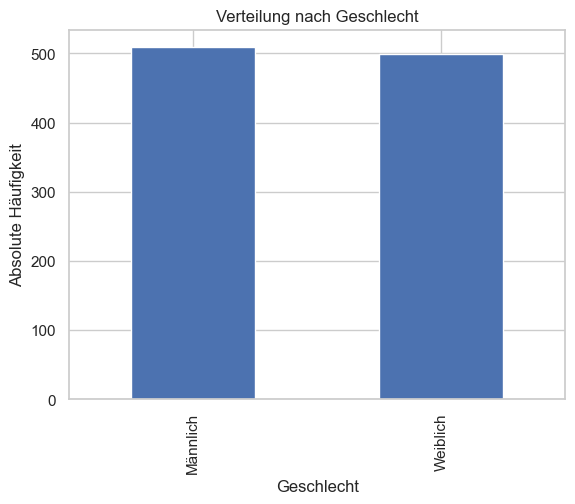

In [164]:
import pandas as pd
import matplotlib.pyplot as plt

# Absolute Häufigkeiten für Geschlecht berechnen
geschlecht_counts = df_renamed['S1'].value_counts().sort_index()

# Balkendiagramm zeichnen
geschlecht_counts.plot(kind='bar')
plt.xlabel("Geschlecht")
plt.ylabel("Absolute Häufigkeit")
plt.title("Verteilung nach Geschlecht")
plt.show()

In [165]:
geschlecht_counts = df_renamed['S1'].value_counts().sort_index()
print(geschlecht_counts)

S1
Männlich    509
Weiblich    499
Name: count, dtype: int64


#### Überschreiben der Likert-Skalen

In [166]:
# Mapping für SC1

sc1_mapping = {
    "(Fast) die ganze Zeit / ständig": 1,
    "Mehrmals täglich": 2,
    "Etwa einmal täglich": 3,
}

df_renamed["SC1"] = df_renamed["SC1"].apply(lambda x: sc1_mapping[x] if x in sc1_mapping else np.nan)


In [167]:
# Mapping für alle A2_*-Variablen (A2_1 bis A2_11)
a2_mapping = {
    "Trifft voll und ganz zu": 1,
    "Trifft eher zu": 2,
    "Trifft eher nicht zu": 3,
    "Trifft überhaupt nicht zu": 4,
    "Weiß nicht": np.nan
}

for i in range(1, 12):
    var = f"A2_{i}"
    df_renamed[var] = df_renamed[var].apply(lambda x: a2_mapping[x] if x in a2_mapping else np.nan)

In [168]:
# Mapping für A3_1 bis A3_5
a3_mapping = {
    "Ich verbringe gerne viel Zeit in sozialen Netzwerken": 1,
    "Soziale Netzwerke nehmen zu viel Zeit in Anspruch": 6,
    "Ich halte die meisten Informationen in sozialen Netzwerken für glaubwürdig": 1,
    "Ich halte die meisten Informationen in sozialen Netzwerken für unglaubwürdig": 6,
    "Ich könnte sehr gut ohne soziale Netzwerke auskommen": 1,
    "Ich könnte ohne soziale Netzwerke nicht leben": 6,
    
}

for i in range(1, 6):
    var = f"A3_{i}"
    def map_a3(x):
        if pd.isna(x):
            return np.nan
        if x in a3_mapping:
            return a3_mapping[x]
        try:
            return int(x)
        except:
            return np.nan
    df_renamed[var] = df_renamed[var].apply(map_a3)


In [169]:
# Mapping für B4 (Politisches Interesse)
b4_mapping = {
    "1 Sehr großes Interesse": 1,
    "6 Kein Interesse": 6,
    "Weiß nicht": np.nan,
    "2": 2,
    "3": 3,
    "4": 4,
    "5": 5,
}

df_renamed["B4"] = df_renamed["B4"].apply(lambda x: b4_mapping[x] if x in b4_mapping else np.nan)



In [170]:
# Mapping für B5 
b5_mapping = {
    "Häufig": 1,
    "Gelegentlich": 2,
    "Selten": 3,
    "Nie": 4,
    "Weiß nicht": np.nan
}

# Liste der Variablen: B5_1 bis B5_6, C8, C9
b5_vars = [f"B5_{i}" for i in range(1, 7)] + ["C8", "C9"]

def map_b5(x):
    if pd.isna(x):
        return np.nan
    if x in b5_mapping:
        return b5_mapping[x]
    try:
        return int(x)
    except:
        return np.nan

for var in b5_vars:
    df_renamed[var] = df_renamed[var].apply(map_b5)


In [171]:
#Mapping für B6
b6_mapping = {
    "Nutze ich häufig": 1,
    "Nutze ich gelegentlich": 2,
    "Nutze ich nur selten": 3,
    "Nutze ich nie": 4,
    "Weiß nicht": np.nan
}

for i in range(1, 10):
    var = f"B6_{i}"
    def map_b6(x):
        if pd.isna(x):
            return np.nan
        if x in b6_mapping:
            return b6_mapping[x]
        try:
            return int(x)
        except:
            return np.nan
    df_renamed[var] = df_renamed[var].apply(map_b6)


In [172]:
# Mapping für B7

b7_mapping = {
    "Stimme voll und ganz zu": 1,
    "Stimme eher zu": 2,
    "Stimme eher nicht zu": 3,
    "Stimme überhaupt nicht zu": 4,
    "Weiß nicht": np.nan
}

for i in range(1, 14):
    var = f"B7_{i}"
    def map_b7(x):
        if pd.isna(x):
            return np.nan
        if x in b7_mapping:
            return b7_mapping[x]
        try:
            return int(x)
        except:
            return np.nan
    df_renamed[var] = df_renamed[var].apply(map_b7)


In [173]:
# Mapping für C10

c10_mapping = {
    "Sehr viele": 1,
    "Viele": 2,
    "Wenige": 3,
    "Gar keine": 4,
    "Weiß nicht": np.nan,
    "nan": np.nan,
    "Nutze dieses soziale Netzwerk nicht": np.nan
}

c10_vars = [f"C10_{i}" for i in range(1, 6)]

def map_c10(x):
    if pd.isna(x):
        return np.nan
    if x in c10_mapping:
        return c10_mapping[x]
    try:
        return int(x)
    except:
        return np.nan

for var in c10_vars:
    df_renamed[var] = df_renamed[var].apply(map_c10)


In [174]:
# Mapping für C11
c11_mapping = {
    "1 finde gut, dass es politische Beiträge in meinem SN gibt": 1,
    "6 politische Beiträge in meinen SN nerven mich": 6,
    "Weiß nicht": np.nan
}

def map_c11(x):
    if pd.isna(x):
        return np.nan
    if x in c11_mapping:
        return c11_mapping[x]
    try:
        return int(x) if int(x) in [2, 3, 4, 5] else np.nan
    except:
        return np.nan

df_renamed["C11"] = df_renamed["C11"].apply(map_c11)

# Mapping für C12 ACHTUNG!!!
c12_mapping = {
    "Ich mache gar nichts / ich ignoriere die Beiträge.": 1,
    "Ich blockiere die Absender der Beiträge.": 2,
    "Ich melde mich von der Plattform ab.": 3,
    "Weiß nicht": np.nan
}

df_renamed["C12"] = df_renamed["C12"].apply(lambda x: c12_mapping[x] if x in c12_mapping else np.nan)


# Mapping für C13 ACHTUNG!!!
c13_mapping = {
    "Aktive Suche": 1,
    "Werden automatisch angezeigt": 2,
    "Sowohl als auch": 3,
    "Weiß nicht": np.nan
}

df_renamed["C13"] = df_renamed["C13"].apply(lambda x: c13_mapping[x] if x in c13_mapping else np.nan)


In [175]:
#Mapping für C14

# Mapping für jede C14-Variable
c14_specific_mappings = {
    "C14_1": {
        "respektvoller": 1,
        "weniger respektvoll": 6,
        "Weiß nicht": np.nan
    },
    "C14_2": {
        "informativer": 1,
        "weniger informativ": 6,
        "Weiß nicht": np.nan
    },
    "C14_3": {
        "emotionaler": 1,
        "weniger emotional": 6,
        "Weiß nicht": np.nan
    },
    "C14_4": {
        "politisch korrekter": 1,
        "politisch weniger korrekt": 6,
        "Weiß nicht": np.nan
    },
    "C14_5": {
        "spiegeln eher wichtige politische Debatten wider": 1,
        "spiegeln eher weniger wichtige politische Debatten wider": 6,
        "Weiß nicht": np.nan
    },
    "C14_6": {
        "interessanter": 1,
        "weniger interessant": 6,
        "Weiß nicht": np.nan
    }
}

# Anwendung des Mappings auf jede Variable
for var, mapping in c14_specific_mappings.items():
    def map_c14_specific(x):
        if pd.isna(x):
            return np.nan
        if x in mapping:
            return mapping[x]
        try:
            val = int(x)
            return val if val in [2, 3, 4, 5] else np.nan
        except:
            return np.nan
    df_renamed[var] = df_renamed[var].apply(map_c14_specific)


In [176]:
#Mapping für C15

c15_mapping = {
    "Überwiegend Personen, die ich persönlich kenne": 1,
    "Überwiegend Personen, die ich persönlich nicht kenne": 2,
    "Etwa gleich viel von beidem": 3,
    "Weiß nicht": np.nan,
    "Nutze dieses soziale Netzwerk nicht": np.nan
}

c15_vars = [f"C15_{i}" for i in range(1, 6)]

def map_c15(x):
    if pd.isna(x):
        return np.nan
    if x in c15_mapping:
        return c15_mapping[x]
    try:
        return int(x)
    except:
        return np.nan

for var in c15_vars:
    df_renamed[var] = df_renamed[var].apply(map_c15)


In [177]:
# Mapping für C16

c16_mapping = {
    "Eher ähnliche politische Ansichten wie ich": 1,
    "Eher unterschiedliche politische Ansichten wie ich": 2,
    "Etwa zu gleichen Teilen ähnliche und unterschiedliche politische Ansichten wie ich": 3,
    "Weiß nicht": np.nan,
    "Nutze dieses soziale Netzwerk nicht": np.nan
}

c16_vars = [f"C16_{i}" for i in range(1, 6)]

def map_c16(x):
    if pd.isna(x):
        return np.nan
    if x in c16_mapping:
        return c16_mapping[x]
    try:
        return int(x) if int(x) in [1, 2, 3] else np.nan
    except:
        return np.nan

for var in c16_vars:
    df_renamed[var] = df_renamed[var].apply(map_c16)


In [178]:
#Mapping für C17

c17_mapping = {
    "Ich ignoriere den Post.": 1,
    "Ich kommentiere den Post / antworte darauf.": 2,
    "Ich ändere meine Profil-Einstellungen, damit ich weniger Beiträge dieser Person bekomme.": 3,
    "Ich blockiere bzw. entfreunde diese Person.": 4,
    "Das habe ich noch nie erlebt.": 5,
    "Weiß nicht": np.nan
}

df_renamed["C17"] = df_renamed["C17"].apply(lambda x: c17_mapping[x] if x in c17_mapping else np.nan)

In [179]:
#Mapping für C18 & C21
c18_mapping = {
    "Ja": 1,
    "Nein": 2,
    "Weiß nicht": np.nan
}

df_renamed["C18"] = df_renamed["C18"].apply(lambda x: c18_mapping[x] if x in c18_mapping else np.nan)


c21_mapping = {
    "Ja": 1,
    "Nein": 2,
    "Weiß nicht": np.nan
}

df_renamed["C21"] = df_renamed["C21"].apply(lambda x: c21_mapping[x] if x in c21_mapping else np.nan)


In [180]:
# Mapping für C19

c19_mapping = {
    "Personen und Organisationen, die Ihre politische Meinung teilen": 1,
    "Personen und Organisationen, die eine andere politische Meinung als Sie haben": 2,
    "Sowohl als auch": 3,
    "Weiß nicht": np.nan
}

df_renamed["C19"] = df_renamed["C19"].apply(lambda x: c19_mapping[x] if x in c19_mapping else np.nan)



In [181]:
# Mapping für C20 -> noch offen, ob wir dieses Item brauchen, daher wird es erstmal nicht umcodiert 

In [182]:
# Mapping für C22

c22_mapping = {
    "Sehr gut": 1,
    "Gut": 2,
    "Weniger gut": 3,
    "Schlecht": 4,
    "Weiß nicht": np.nan
}

df_renamed["C22"] = df_renamed["C22"].apply(lambda x: c22_mapping[x] if x in c22_mapping else np.nan)


In [183]:
#Mapping für D23

d23_mapping = {
    "Sehr wichtig": 1,
    "Wichtig": 2,
    "Weniger wichtig": 3,
    "Unwichtig": 4,
    "Weiß nicht": np.nan
}

d23_vars = [f"D23_{i}" for i in range(1, 15)]

def map_d23(x):
    if pd.isna(x):
        return np.nan
    if x in d23_mapping:
        return d23_mapping[x]
    try:
        return int(x) if int(x) in [1, 2, 3, 4] else np.nan
    except:
        return np.nan

for var in d23_vars:
    df_renamed[var] = df_renamed[var].apply(map_d23)


In [184]:
# Mapping für D24

d24_mapping = {
    "Nutze ich häufig": 1,
    "Nutze ich gelegentlich": 2,
    "Nutze ich selten": 3,
    "Kenne ich zwar, nutze ich aber nie": 4,
    "Kenne ich nicht": np.nan,
    "Weiß nicht": np.nan
}

d24_vars = [f"D24_{i}" for i in range(1, 15)]

def map_d24(x):
    if pd.isna(x):
        return np.nan
    if x in d24_mapping:
        return d24_mapping[x]
    try:
        return int(x) if int(x) in [1, 2, 3, 4] else np.nan
    except:
        return np.nan

for var in d24_vars:
    df_renamed[var] = df_renamed[var].apply(map_d24)


In [185]:
# Mapping für D25 Erwartung an Kanäle der Bundesregierung -> wird vorerst nicht umcodiert, da wir diese Items eventuell nicht verwenden

In [186]:
# Mapping für E26 

e26_mapping = {
    "Sehr gut": 1,
    "Gut": 2,
    "Weniger gut": 3,
    "Schlecht": 4,
    "Weiß nicht": np.nan
}

df_renamed["E26"] = df_renamed["E26"].apply(lambda x: e26_mapping[x] if x in e26_mapping else np.nan)


In [187]:
e27_mapping = {
    "Sehr zufrieden": 1,
    "Zufrieden": 2,
    "Weniger zufrieden": 3,
    "Gar nicht zufrieden": 4,
    "Weiß nicht": np.nan
}

df_renamed["E27"] = df_renamed["E27"].apply(lambda x: e27_mapping[x] if x in e27_mapping else np.nan)


In [188]:
# Mapping für E28 & E29

e28_mapping = {
    "Gute Regierungsform": 1,
    "Nicht so gute Regierungsform": 2,
    "Weiß nicht": np.nan
}

df_renamed["E28"] = df_renamed["E28"].apply(lambda x: e28_mapping[x] if x in e28_mapping else np.nan)

e29_mapping = {
    "Sehr stark": 1,
    "Stark": 2,
    "Weniger stark": 3,
    "Überhaupt nicht": 4,
    "Weiß nicht": np.nan
}

df_renamed["E29"] = df_renamed["E29"].apply(lambda x: e29_mapping[x] if x in e29_mapping else np.nan)



In [189]:
# Soziodemografie Mapping

s4_mapping = {
    "Von der Schule abgegangen ohne Schulabschluss": 0,
    "Haupt- oder Volksschul-Abschluss": 1,
    "Mittlere Reife oder Abschluss der polytechnischen Oberschule": 2,
    "Abitur, Fachhochschulreife (Gymnasium oder erweiterte Oberschule EOS)": 3,
    "Fachhochschulabschluss, Hochschulabschluss": 4,
    "Noch in Schulausbildung mit Abschlussziel Haupt-/Realschulabschluss": 5,
    "Noch in Schulausbildung mit Abschlussziel Hochschulreife": 6,
    "Anderer Abschluss": 7
}

df_renamed["S4"] = df_renamed["S4"].apply(lambda x: s4_mapping[x] if x in s4_mapping else np.nan)



In [190]:
s5_mapping = {
    "Voll-/Teilzeiterwerbstätig (auch Mini-Jobs)": 1,
    "Auszubildende/r": 2,
    "In einem Ein-Euro-Job tätig": 3,
    "Arbeitslos (ohne Ein-Euro-Job)": 4,
    "In Altersteilzeit (egal, welche Phase)": 5,
    "Rentner/in oder Pensionär/in": 6,
    "Schüler/in": 7,
    "Student/in": 8,
    "Hausfrau/Hausmann": 9,
    "Freiwilliges soziales oder ökologisches Jahr / Bundesfreiwilligendienst": 10,
    "Sonstiges": 11,
    "Keine Angabe": np.nan
}

df_renamed["S5"] = df_renamed["S5"].apply(lambda x: s5_mapping[x] if x in s5_mapping else np.nan)

In [191]:
s6_mapping = {
    "Arbeiter/in": 1,
    "Angestellte/r": 2,
    "Beamte/r (auch: Richter/in und Berufssoldaten/in)": 3,
    "Landwirt/in": 4,
    "Selbstständige/r bzw. Freiberufler/in": 5,
    "Unternehmer/in": 6,
    "Sonstiges": 7,
    "Keine Angabe": np.nan
}

df_renamed["S6"] = df_renamed["S6"].apply(lambda x: s6_mapping[x] if x in s6_mapping else np.nan)


In [192]:
#Alter überschreiben, sodass es nur noch eine Zahl ist

df_renamed["S2"] = df_renamed["S2"].astype(str).str.extract(r"(\d+)").astype(float)


In [193]:
# Haushaltsgröße überschreiben, sodass es nur noch eine Zahl ist
df_renamed["S3"] = df_renamed["S3"].astype(str).str.extract(r"(\d+)").astype(float)

##### Überprüfung, ob das Mapping funktioniert hat

In [245]:
df_renamed['SC2_1'].value_counts(dropna=False)

SC2_1
1    853
0    155
Name: count, dtype: int64

In [195]:
# Neue Altersvariable in Gruppen 

def categorize_age(age):
    if pd.isna(age):
        return np.nan
    elif age < 20:
        return "0-19"
    elif age < 30:
        return "20-29"
    elif age < 40:
        return "30-39"
    elif age < 50:
        return "40-49"
    elif age < 60:
        return "50-59"
    elif age < 70:
        return "60-69"
    else:
        return "70+"

df_renamed["S2_groups"] = df_renamed["S2"].apply(categorize_age)


/var/folders/qn/mc64dhnj33bc5fwdgz5sxvkr0000gp/T/ipykernel_9167/1792995911.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_renamed["S2_groups"] = df_renamed["S2"].apply(categorize_age)


In [196]:
# Ersetze "quoted" durch 1 und "not quoted" durch 0 in allen Zellen.
def replace_quoted(value):
    if pd.isna(value):
        return np.nan
    elif value == "quoted":
        return 1
    elif value == "not quoted":
        return 0
    else:
        return value
# Wende die Funktion auf alle Spalten an, außer auf die Altersgruppe
for col in df_renamed.columns:
    if col != "S2_groups":
        df_renamed[col] = df_renamed[col].apply(replace_quoted)

# Fülle alle leere Zellen mit NaN
df_renamed = df_renamed.replace("", np.nan)
df_renamed = df_renamed.replace(" ", np.nan)

/var/folders/qn/mc64dhnj33bc5fwdgz5sxvkr0000gp/T/ipykernel_9167/1759213553.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_renamed = df_renamed.replace(" ", np.nan)


In [197]:
#Überflüssige Variable entfernen
df_renamed = df_renamed.drop(columns=["C19_num"], errors="ignore")


In [198]:
# Überprüfen, ob eine Variable nur aus NaN-Werten besteht
def check_all_nan(df):
    all_nan_vars = [col for col in df.columns if df[col].isna().all()]
    return all_nan_vars
# Überprüfen und Ausgabe der Variablen, die nur NaN-Werte enthalten
nan_vars = check_all_nan(df_renamed)
if nan_vars:
    print("Folgende Variablen enthalten nur NaN-Werte:", nan_vars)
else:
    print("Keine Variablen enthalten nur NaN-Werte.")

Keine Variablen enthalten nur NaN-Werte.


In [199]:
df_renamed.head(10)

,za_nr,version,doi,lfdn,SC1,SC2_1,SC2_2,SC2_3,SC2_4,SC2_5,SC2_6,SC2_7,SC2_8,SC2_9,SC2_10,SC2_11,SC2_99,SC3_1,SC3_2,SC3_3,SC3_4,SC3_5,SC3_6,SC3_7,SC3_8,SC3_9,SC3_10,SC3_11,A1_1,A1_2,A1_3,A1_4,A1_5,A1_6,A1_7,A1_8,A1_9,A1_10,A1_11,A2_1,A2_2,A2_3,A2_4,A2_5,A2_6,A2_7,A2_8,A2_9,A2_10,A2_11,A3_1,A3_2,A3_3,A3_4,A3_5,B4,B5_1,B5_2,B5_3,B5_4,B5_5,B5_6,B6_1,B6_2,B6_3,B6_4,B6_5,B6_6,B6_7,B6_8,B6_9,B7_1,B7_2,B7_3,B7_4,B7_5,B7_6,B7_7,B7_8,B7_9,B7_10,B7_11,B7_12,B7_13,C8,C9,C10_1,C10_2,C10_3,C10_4,C10_5,C11,C12,C13,C14_1,C14_2,C14_3,C14_4,C14_5,C14_6,C15_1,C15_2,C15_3,C15_4,C15_5,C16_1,C16_2,C16_3,C16_4,C16_5,C17,C18,C19,C20_1,C20_2,C20_3,C20_4,C20_5,C20_6,C20_7,C20_8,C20_9,C20_10,C21,C22,D23_1,D23_2,D23_3,D23_4,D23_5,D23_6,D23_7,D23_8,D23_9,D23_10,D23_11,D23_12,D23_13,D23_14,D24_1,D24_2,D24_3,D24_4,D24_5,D24_6,D24_7,D24_8,D24_9,D24_10,D24_11,D24_12,D24_13,D24_14,D25_1,D25_2,D25_3,D25_4,D25_5,D25_6,D25_7,D25_8,E26,E27,E28,E29,S1,S2,S3,S4,S5,S6,S7,S8,S9,FAKTdly,Alter_clean,S2_groups
0,6720,1.0.0 (2019-03-29),doi:10.4232/1.13221,10371,2,1,1,1,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,Smartphone,Smartphone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Smartphone,3.0,4.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,4.0,2.0,3.0,6.0,4.0,3.0,1.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4,4.0,4.0,3.0,4.0,2.0,2.0,4.0,4.0,2.0,3.0,1.0,3.0,3.0,2.0,3.0,2.0,4.0,2.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,6.0,2.0,2.0,6.0,5.0,6.0,6.0,6.0,6.0,2.0,NaN,3.0,2.0,NaN,2.0,3.0,NaN,NaN,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,0,0,0,1,0,0,0,0,2.0,4.0,2.0,4.0,Männlich,37.0,1.0,2,1.0,2.0,Berlin,500.000 oder mehr Einwohner,Keine Angabe,"0,857",37,30-39
1,6720,1.0.0 (2019-03-29),doi:10.4232/1.13221,10372,2,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,Smartphone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Smartphone,2.0,3.0,1.0,1.0,3.0,3.0,3.0,1.0,2.0,2.0,1.0,1.0,3.0,5.0,2.0,6.0,5.0,2.0,2.0,2.0,4.0,2.0,1.0,1,3.0,3.0,4.0,2.0,4.0,2.0,4.0,4.0,3.0,2.0,3.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,3.0,4.0,3.0,1.0,4.0,3.0,4.0,NaN,4.0,4.0,2.0,NaN,2.0,3.0,3.0,5.0,4.0,5.0,6.0,1.0,3.0,NaN,2.0,1.0,1.0,NaN,NaN,NaN,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,1.0,3.0,3.0,3.0,4.0,2.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,4.0,4.0,4.0,3.0,NaN,2.0,NaN,1.0,NaN,NaN,1,1,1,1,0,0,0,0,2.0,4.0,1.0,2.0,Weiblich,28.0,2.0,0,1.0,1.0,Brandenburg,20.000 bis unter 50.000 Einwohner,2.000 bis unter 2.500 EURO,"2,579",28,20-29
2,6720,1.0.0 (2019-03-29),doi:10.4232/1.13221,10374,2,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,Smartphone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Smartphone,2.0,1.0,2.0,1.0,4.0,3.0,4.0,1.0,1.0,4.0,2.0,2.0,5.0,5.0,3.0,4.0,3.0,4.0,3.0,1.0,4.0,4.0,1.0,3,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,3.0,2.0,2.0,2.0,1.0,3.0,3.0,1.0,4.0,1.0,NaN,4.0,NaN,3.0,4.0,3.0,4.0,NaN,NaN,4.0,NaN,NaN,2.0,6.0,3.0,1.0,5.0,3.0,3.0,3.0,2.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,3.0,1.0,4.0,1.0,3.0,1.0,1.0,NaN,1.0,4.0,1.0,2.0,4.0,2.0,4.0,2.0,NaN,NaN,4.0,4.0,4.0,NaN,NaN,3.0,NaN,NaN,1,1,1,1,0,0,0,0,3.0,NaN,1.0,2.0,Weiblich,40.0,3.0,2,9.0,NaN,Niedersachsen,100.000 bis unter 500.000 Einwohner,Keine Angabe,"0,614",40,40-49
3,6720,1.0.0 (2019-03-29),doi:10.4232/1.13221,10375,3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Laptop / Notebook / Netbook / Ultrabook / Macbook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,4.0,1.0,6.0,5.0,4.0,5.0,1.0,1.0,2.0,1.0,4.0,1.0,2.0,1.0,1,2.0,2.0,1.0,2.0,4.0,4.0,2.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,4.0,3.0,4.0,4.0,3.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,6.0,5.0,1.0,6.0,6.0,6.0,1.0,NaN,NaN,2.0,NaN,3.0,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,2.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,NaN,3.0,4.0,4.0,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,1,1,1,1,0,0,0,0,2.0,2.0,1.0,1.0,Männlich,38.0,2.0,3,1.0,5.0,Nordrhein-Westfalen,100.000 bis unter 500.000 Einwohner,3

In [200]:
# Speichere den Datensatz mit den umbenannten und bereinigten Variablen
df_renamed.to_csv("data/Datensatz_Intensivnutzung_bereinigt.csv", index=False)
print("Datensatz wurde erfolgreich bereinigt und gespeichert.")

Datensatz wurde erfolgreich bereinigt und gespeichert.


### Erste Analysen: Korrelationen

In [201]:
# Datensatz mit den umbenannten und bereinigten Variablen einlesen
df_cleaned = pd.read_csv("data/Datensatz_Intensivnutzung_bereinigt.csv")

In [202]:
df_cleaned.head(10)

,za_nr,version,doi,lfdn,SC1,SC2_1,SC2_2,SC2_3,SC2_4,SC2_5,SC2_6,SC2_7,SC2_8,SC2_9,SC2_10,SC2_11,SC2_99,SC3_1,SC3_2,SC3_3,SC3_4,SC3_5,SC3_6,SC3_7,SC3_8,SC3_9,SC3_10,SC3_11,A1_1,A1_2,A1_3,A1_4,A1_5,A1_6,A1_7,A1_8,A1_9,A1_10,A1_11,A2_1,A2_2,A2_3,A2_4,A2_5,A2_6,A2_7,A2_8,A2_9,A2_10,A2_11,A3_1,A3_2,A3_3,A3_4,A3_5,B4,B5_1,B5_2,B5_3,B5_4,B5_5,B5_6,B6_1,B6_2,B6_3,B6_4,B6_5,B6_6,B6_7,B6_8,B6_9,B7_1,B7_2,B7_3,B7_4,B7_5,B7_6,B7_7,B7_8,B7_9,B7_10,B7_11,B7_12,B7_13,C8,C9,C10_1,C10_2,C10_3,C10_4,C10_5,C11,C12,C13,C14_1,C14_2,C14_3,C14_4,C14_5,C14_6,C15_1,C15_2,C15_3,C15_4,C15_5,C16_1,C16_2,C16_3,C16_4,C16_5,C17,C18,C19,C20_1,C20_2,C20_3,C20_4,C20_5,C20_6,C20_7,C20_8,C20_9,C20_10,C21,C22,D23_1,D23_2,D23_3,D23_4,D23_5,D23_6,D23_7,D23_8,D23_9,D23_10,D23_11,D23_12,D23_13,D23_14,D24_1,D24_2,D24_3,D24_4,D24_5,D24_6,D24_7,D24_8,D24_9,D24_10,D24_11,D24_12,D24_13,D24_14,D25_1,D25_2,D25_3,D25_4,D25_5,D25_6,D25_7,D25_8,E26,E27,E28,E29,S1,S2,S3,S4,S5,S6,S7,S8,S9,FAKTdly,Alter_clean,S2_groups
0,6720,1.0.0 (2019-03-29),doi:10.4232/1.13221,10371,2,1,1,1,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,Smartphone,Smartphone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Smartphone,3.0,4.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,4.0,2.0,3.0,6.0,4.0,3.0,1.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4,4.0,4.0,3.0,4.0,2.0,2.0,4.0,4.0,2.0,3.0,1.0,3.0,3.0,2.0,3.0,2.0,4.0,2.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,6.0,2.0,2.0,6.0,5.0,6.0,6.0,6.0,6.0,2.0,NaN,3.0,2.0,NaN,2.0,3.0,NaN,NaN,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,0,0,0,1,0,0,0,0,2.0,4.0,2.0,4.0,Männlich,37.0,1.0,2,1.0,2.0,Berlin,500.000 oder mehr Einwohner,Keine Angabe,"0,857",37,30-39
1,6720,1.0.0 (2019-03-29),doi:10.4232/1.13221,10372,2,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,Smartphone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Smartphone,2.0,3.0,1.0,1.0,3.0,3.0,3.0,1.0,2.0,2.0,1.0,1.0,3.0,5.0,2.0,6.0,5.0,2.0,2.0,2.0,4.0,2.0,1.0,1,3.0,3.0,4.0,2.0,4.0,2.0,4.0,4.0,3.0,2.0,3.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,3.0,4.0,3.0,1.0,4.0,3.0,4.0,NaN,4.0,4.0,2.0,NaN,2.0,3.0,3.0,5.0,4.0,5.0,6.0,1.0,3.0,NaN,2.0,1.0,1.0,NaN,NaN,NaN,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,1.0,3.0,3.0,3.0,4.0,2.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,4.0,4.0,4.0,3.0,NaN,2.0,NaN,1.0,NaN,NaN,1,1,1,1,0,0,0,0,2.0,4.0,1.0,2.0,Weiblich,28.0,2.0,0,1.0,1.0,Brandenburg,20.000 bis unter 50.000 Einwohner,2.000 bis unter 2.500 EURO,"2,579",28,20-29
2,6720,1.0.0 (2019-03-29),doi:10.4232/1.13221,10374,2,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,Smartphone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Smartphone,2.0,1.0,2.0,1.0,4.0,3.0,4.0,1.0,1.0,4.0,2.0,2.0,5.0,5.0,3.0,4.0,3.0,4.0,3.0,1.0,4.0,4.0,1.0,3,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,3.0,2.0,2.0,2.0,1.0,3.0,3.0,1.0,4.0,1.0,NaN,4.0,NaN,3.0,4.0,3.0,4.0,NaN,NaN,4.0,NaN,NaN,2.0,6.0,3.0,1.0,5.0,3.0,3.0,3.0,2.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,3.0,1.0,4.0,1.0,3.0,1.0,1.0,NaN,1.0,4.0,1.0,2.0,4.0,2.0,4.0,2.0,NaN,NaN,4.0,4.0,4.0,NaN,NaN,3.0,NaN,NaN,1,1,1,1,0,0,0,0,3.0,NaN,1.0,2.0,Weiblich,40.0,3.0,2,9.0,NaN,Niedersachsen,100.000 bis unter 500.000 Einwohner,Keine Angabe,"0,614",40,40-49
3,6720,1.0.0 (2019-03-29),doi:10.4232/1.13221,10375,3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Laptop / Notebook / Netbook / Ultrabook / Macbook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,4.0,1.0,6.0,5.0,4.0,5.0,1.0,1.0,2.0,1.0,4.0,1.0,2.0,1.0,1,2.0,2.0,1.0,2.0,4.0,4.0,2.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,4.0,3.0,4.0,4.0,3.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,6.0,5.0,1.0,6.0,6.0,6.0,1.0,NaN,NaN,2.0,NaN,3.0,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,2.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,NaN,3.0,4.0,4.0,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,1,1,1,1,0,0,0,0,2.0,2.0,1.0,1.0,Männlich,38.0,2.0,3,1.0,5.0,Nordrhein-Westfalen,100.000 bis unter 500.000 Einwohner,3

In [203]:
from scipy.stats import pearsonr

# Nur vollständige Fälle (ohne NaN) verwenden
daten = df_cleaned[["A2_3", "A3_2"]].dropna()

# Pearson-Korrelation + p-Wert berechnen
korrelation, p_wert = pearsonr(daten["A2_3"], daten["A3_2"])

print(f"Korrelationskoeffizient: {korrelation:.3f}")
print(f"P-Wert: {p_wert:.10f}")


Korrelationskoeffizient: 0.198
P-Wert: 0.0000000003


In [204]:
df_cleaned[["A2_3", "A3_2"]].dtypes

A2_3    float64
A3_2    float64
dtype: object

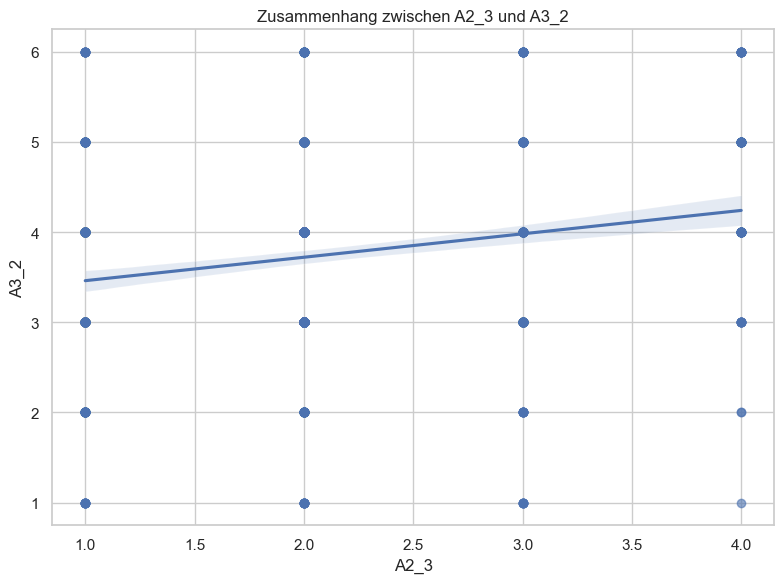

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

# Nur vollständige Daten (ohne NaNs)
daten = df_cleaned[["A2_3", "A3_2"]].dropna()

# Stil für das Diagramm setzen
sns.set(style="whitegrid")

# Diagramm erzeugen
plt.figure(figsize=(8, 6))
sns.regplot(
    x="A2_3",
    y="A3_2",
    data=daten,
    ci=95,
    scatter_kws={"alpha": 0.6}
)

# Achsenbeschriftungen und Titel
plt.title("Zusammenhang zwischen A2_3 und A3_2") 
# hier würde man selbstverständlich die tatsächlichen Variablennamen reinschreiben
plt.xlabel("A2_3")
plt.ylabel("A3_2")

# Anzeige optimieren und Plot anzeigen
plt.tight_layout()
plt.show()

In [206]:
# Hypothese testen: politisches Engagement & Demokratiezufriedenheit 
# Index bilden für politisches Engagement: C8 & C9



#### Reliabilitätsprüfung für Index politisches Engagement (C8 & C9)
Wir prüfen die interne Konsistenz (Reliabilität) der beiden Variablen C8 und C9 mittels Cronbachs Alpha, um zu beurteilen, ob sie zu einem sinnvollen Index für politisches Engagement zusammengefasst werden können.

In [207]:
import numpy as np

def cronbach_alpha(df):
    df = df.dropna()
    k = df.shape[1]
    variances = df.var(axis=0, ddof=1)
    total_var = df.sum(axis=1).var(ddof=1)
    if total_var == 0:
        return np.nan
    alpha = (k / (k - 1)) * (1 - variances.sum() / total_var)
    return alpha

# Auswahl der Variablen
engagement_vars = df_cleaned[["C8", "C9"]]

# Cronbachs Alpha berechnen
alpha = cronbach_alpha(engagement_vars)
print(f"Cronbachs Alpha für C8 & C9: {alpha:.3f}")

# Interpretation
if alpha >= 0.8:
    print("→ Sehr gute Reliabilität (>= 0.8)")
elif alpha >= 0.7:
    print("→ Akzeptable Reliabilität (>= 0.7)")
elif alpha >= 0.6:
    print("→ Grenzwertige Reliabilität (>= 0.6)")
else:
    print("→ Niedrige Reliabilität (< 0.6)")

Cronbachs Alpha für C8 & C9: 0.792
→ Akzeptable Reliabilität (>= 0.7)


#### Indexbildung: Politisches Engagement in sozialen Netzwerken
Die Variablen C8 und C9 werden zu einem Index für politisches Engagement zusammengefasst (Mittelwertbildung, sofern mindestens eine Angabe vorliegt).

In [208]:
# Index politisches Engagement: Mittelwert aus C8 und C9 (sofern mindestens eine Angabe vorhanden)
df_cleaned["polit_engagement_index"] = df_renamed[["C8", "C9"]].mean(axis=1, skipna=True)

# Verteilung und erste Kontrolle
display(df_cleaned[["C8", "C9", "polit_engagement_index"]].head(4))
print(df_cleaned["polit_engagement_index"].describe())

,C8,C9,polit_engagement_index
0,4.0,4.0,4.0
1,1.0,4.0,2.5
2,3.0,4.0,3.5
3,4.0,4.0,4.0


count    1005.000000
mean        3.286070
std         0.747176
min         1.000000
25%         3.000000
50%         3.500000
75%         4.000000
max         4.000000
Name: polit_engagement_index, dtype: float64


Korrelationskoeffizient: -0.006
P-Wert: 0.8612517686


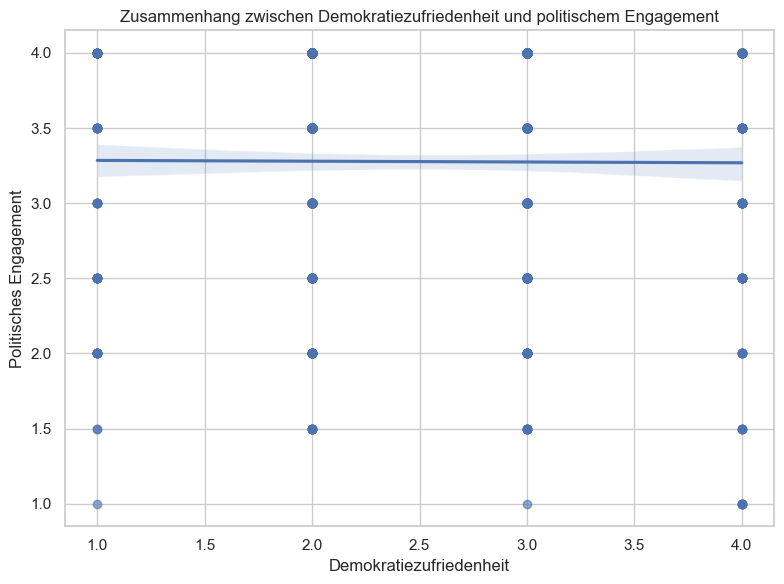

In [209]:
# Hypothese testen: E27 & politisches Engagement
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# Nur vollständige Fälle (ohne NaN) verwenden
daten = df_cleaned[["E27", "polit_engagement_index"]].dropna()
# Pearson-Korrelation + p-Wert berechnen
korrelation, p_wert = pearsonr(daten["E27"], daten["polit_engagement_index"])
print(f"Korrelationskoeffizient: {korrelation:.3f}")
print(f"P-Wert: {p_wert:.10f}")
# Visualisierung der Korrelation
plt.figure(figsize=(8, 6))
sns.regplot(
    x="E27",
    y="polit_engagement_index",
    data=daten,
    ci=95,
    scatter_kws={"alpha": 0.6}
)
# Achsenbeschriftungen und Titel
plt.title("Zusammenhang zwischen Demokratiezufriedenheit und politischem Engagement")
plt.xlabel("Demokratiezufriedenheit")
plt.ylabel("Politisches Engagement")
plt.tight_layout()
plt.show()

In [210]:
df_cleaned[["B7_3", "B7_4"]].corr()

from scipy.stats import pearsonr

# Nur vollständige Fälle (ohne NaN) verwenden
daten = df_cleaned[["B7_3", "B7_4"]].dropna()

# Pearson-Korrelation + p-Wert berechnen
korrelation, p_wert = pearsonr(daten["B7_3"], daten["B7_4"])

print(f"Korrelationskoeffizient: {korrelation:.3f}")
print(f"P-Wert: {p_wert:.20f}")

Korrelationskoeffizient: 0.455
P-Wert: 0.00000000000000000000


In [211]:
df_renamed[["B7_3", "B7_4"]].dtypes

B7_3    float64
B7_4    float64
dtype: object

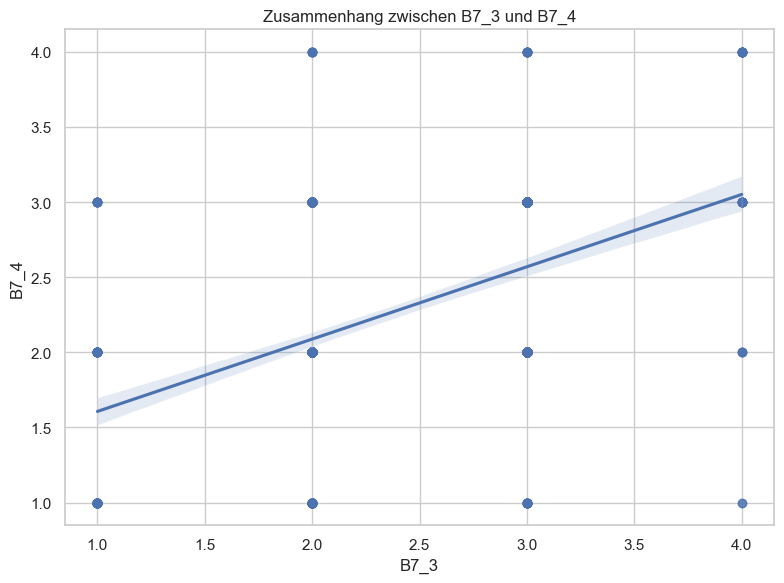

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt

# Nur vollständige Daten (ohne NaNs)
daten = df_cleaned[["B7_3", "B7_4"]].dropna()

# Stil für das Diagramm setzen
sns.set(style="whitegrid")

# Diagramm erzeugen
plt.figure(figsize=(8, 6))
sns.regplot(
    x="B7_3",
    y="B7_4",
    data=daten,
    ci=95,
    scatter_kws={"alpha": 0.6}
)

# Achsenbeschriftungen und Titel
plt.title("Zusammenhang zwischen B7_3 und B7_4")
plt.xlabel("B7_3")
plt.ylabel("B7_4")

# Anzeige optimieren und Plot anzeigen
plt.tight_layout()
plt.show()

### Reliabilitätsanalyse für Indexbildung: C8 und C9
Berechnung von Cronbachs Alpha, um die interne Konsistenz der beiden Variablen als Index für politisches Engagement in sozialen Netzwerken zu prüfen.

In [213]:
from scipy.stats import pearsonr
import numpy as np

# Auswahl der Variablen
reli_data = df_cleaned[["C8", "C9"]].dropna()

# Cronbachs Alpha Funktion für 2 Items
def cronbach_alpha_2items(x, y):
    r, _ = pearsonr(x, y)
    return (2 * r) / (1 + r)

alpha = cronbach_alpha_2items(reli_data["C8"], reli_data["C9"])
print(f"Cronbachs Alpha für C8 und C9: {alpha:.3f}")

# Interpretation
if alpha >= 0.7:
    print("Die Reliabilität ist akzeptabel bis gut. Die Indexbildung ist sinnvoll.")
elif alpha >= 0.6:
    print("Die Reliabilität ist grenzwertig, aber noch akzeptabel.")
else:
    print("Die Reliabilität ist niedrig. Die Indexbildung sollte kritisch geprüft werden.")

Cronbachs Alpha für C8 und C9: 0.797
Die Reliabilität ist akzeptabel bis gut. Die Indexbildung ist sinnvoll.


###  Soziodemografie abbilden

In [224]:
#Geschlecht

# Absolute Häufigkeit
print("Absolute Häufigkeit (S1):")
print(df_renamed["S1"].value_counts(dropna=False))

# Relative Häufigkeit
print("\nRelative Häufigkeit (S1):")
print(df_renamed["S1"].value_counts(normalize=True, dropna=False).round(3))


Absolute Häufigkeit (S1):
S1
Männlich    509
Weiblich    499
Name: count, dtype: int64

Relative Häufigkeit (S1):
S1
Männlich    0.505
Weiblich    0.495
Name: proportion, dtype: float64


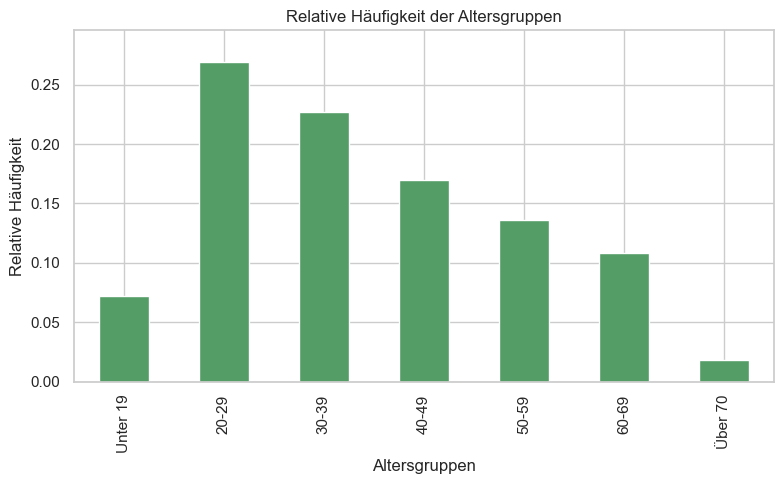

In [226]:
# Altersgruppen-Beschriftungen anpassen
altersgruppen_labels = {
    "0-19": "Unter 19",
    "20-29": "20-29",
    "30-39": "30-39",
    "40-49": "40-49",
    "50-59": "50-59",
    "60-69": "60-69",
    "70+": "Über 70"
}

# Relative Häufigkeiten berechnen
rel_freq = df_renamed["S2_groups"].value_counts(normalize=True, dropna=False).sort_index()
rel_freq.index = rel_freq.index.map(altersgruppen_labels)

# Balkendiagramm
plt.figure(figsize=(8,5))
rel_freq.plot(kind="bar", color="#549D67")
plt.xlabel("Altersgruppen")
plt.ylabel("Relative Häufigkeit")
plt.title("Relative Häufigkeit der Altersgruppen")
plt.ylim(0, rel_freq.max()*1.1)
plt.tight_layout()
plt.show()

In [227]:
#Bildung

# Absolute Häufigkeit
print("Absolute Häufigkeit (S4):")
print(df_renamed["S4"].value_counts(dropna=False))

# Relative Häufigkeit
print("\nRelative Häufigkeit (S4):")
print(df_renamed["S4"].value_counts(normalize=True, dropna=False).round(3))

Absolute Häufigkeit (S4):
S4
2    365
3    231
4    193
1    157
6     31
5     18
0     10
7      3
Name: count, dtype: int64

Relative Häufigkeit (S4):
S4
2    0.362
3    0.229
4    0.191
1    0.156
6    0.031
5    0.018
0    0.010
7    0.003
Name: proportion, dtype: float64


In [229]:
# Bildung
# Mapping für Labels
abschluss_labels = {
    0: "Sonstiges",  # wird zusammengefasst
    1: "Haupt- oder Volksschul-Abschluss",
    2: "Mittlere Reife oder Abschluss der polytechnischen Oberschule",
    3: "Abitur, Fachhochschulreife (Gymnasium oder erweiterte Oberschule EOS)",
    4: "Fachhochschulabschluss, Hochschulabschluss",
    5: "Noch in Schulausbildung mit Abschlussziel Haupt-/Realschulabschluss",
    6: "Noch in Schulausbildung mit Abschlussziel Hochschulreife",
    7: "Sonstiges"  # wird zusammengefasst
}

# S4 als int (falls nicht schon)
df_renamed["S4_int"] = df_renamed["S4"].astype('float').astype('Int64')

# Zusammenfassen von 0 und 7 zu "Sonstiges"
def map_sonstiges(x):
    if pd.isna(x):
        return np.nan
    if x in [0, 7]:
        return "Sonstiges"
    return abschluss_labels.get(x, "Unbekannt")

abschluss_series = df_renamed["S4_int"].apply(map_sonstiges)

# Relative Häufigkeiten in Prozent berechnen
rel_freq = abschluss_series.value_counts(normalize=True, dropna=False) * 100

# DataFrame für die Tabelle, sortiert nach Häufigkeit (absteigend)
result_df = pd.DataFrame({
    '<span style="color:#549D67"><b>Abschluss</b></span>': rel_freq.index,
    '<span style="color:#549D67"><b>Relative Häufigkeit (%)</b></span>': rel_freq.round(1).values
}).sort_values(by='<span style="color:#549D67"><b>Relative Häufigkeit (%)</b></span>', ascending=False).reset_index(drop=True)

# Anzeige als HTML-Tabelle mit farbigen Spaltennamen
from IPython.display import display, HTML
display(HTML(result_df.to_html(escape=False, index=False)))


Abschluss,Relative Häufigkeit (%)
Mittlere Reife oder Abschluss der polytechnischen Oberschule,36.2
"Abitur, Fachhochschulreife (Gymnasium oder erweiterte Oberschule EOS)",22.9
"Fachhochschulabschluss, Hochschulabschluss",19.1
Haupt- oder Volksschul-Abschluss,15.6
Noch in Schulausbildung mit Abschlussziel Hochschulreife,3.1
Noch in Schulausbildung mit Abschlussziel Haupt-/Realschulabschluss,1.8
Sonstiges,1.3


In [230]:
# Erwerbstätigkeit 

# Absolute Häufigkeit
print("Absolute Häufigkeit (S5):")
print(df_renamed["S5"].value_counts(dropna=False))

# Relative Häufigkeit
print("\nRelative Häufigkeit (S5):")
print(df_renamed["S5"].value_counts(normalize=True, dropna=False).round(3))

Absolute Häufigkeit (S5):
S5
1.0     667
6.0     110
8.0      62
7.0      51
9.0      34
11.0     30
2.0      26
4.0      13
NaN       7
5.0       5
10.0      2
3.0       1
Name: count, dtype: int64

Relative Häufigkeit (S5):
S5
1.0     0.662
6.0     0.109
8.0     0.062
7.0     0.051
9.0     0.034
11.0    0.030
2.0     0.026
4.0     0.013
NaN     0.007
5.0     0.005
10.0    0.002
3.0     0.001
Name: proportion, dtype: float64


In [231]:
# Berufliche Stellung

# Absolute Häufigkeit
print("Absolute Häufigkeit (S6):")
print(df_renamed["S6"].value_counts(dropna=False))

# Relative Häufigkeit
print("\nRelative Häufigkeit (S6:")
print(df_renamed["S6"].value_counts(normalize=True, dropna=False).round(3)) 

Absolute Häufigkeit (S6):
S6
2.0    501
NaN    345
1.0     83
3.0     39
5.0     32
7.0      5
6.0      3
Name: count, dtype: int64

Relative Häufigkeit (S6:
S6
2.0    0.497
NaN    0.342
1.0    0.082
3.0    0.039
5.0    0.032
7.0    0.005
6.0    0.003
Name: proportion, dtype: float64


In [234]:
# Bundesland - abgebildet in einer Deutschlandkarte

# Relative Häufigkeit in Prozent
print("\nRelative Häufigkeit (S7) in Prozent:")
print((df_renamed["S7"].value_counts(normalize=True, dropna=False) * 100).round(2))



Relative Häufigkeit (S7) in Prozent:
S7
Nordrhein-Westfalen       24.60
Bayern                    13.00
Baden-Württemberg         11.90
Niedersachsen              9.13
Hessen                     7.84
Sachsen                    5.56
Rheinland-Pfalz            5.26
Schleswig-Holstein         4.27
Berlin                     3.77
Thüringen                  3.08
Brandenburg                2.78
Sachsen-Anhalt             2.58
Hamburg                    2.38
Mecklenburg-Vorpommern     1.69
Bremen                     1.39
Saarland                   0.79
Name: proportion, dtype: float64


In [238]:
import geopandas as gpd

# Beispiel: GeoJSON der deutschen Bundesländer von einer öffentlichen Quelle
url = "https://raw.githubusercontent.com/isellsoap/deutschlandGeoJSON/main/2_bundeslaender/2_hoch.geo.json"
bundeslaender = gpd.read_file(url)

# Zeige die ersten Zeilen & Spaltennamen
print(bundeslaender.head())
print(bundeslaender.columns)

      id               name   type  \
0  DE-BW  Baden-Württemberg  State   
1  DE-BY             Bayern  State   
2  DE-BE             Berlin  State   
3  DE-BB        Brandenburg  State   
4  DE-HB             Bremen  State   

                                            geometry  
0  MULTIPOLYGON (((9.6505 49.776, 9.651 49.765, 9...  
1  POLYGON ((10.134 50.55, 10.14 50.543, 10.152 5...  
2  POLYGON ((13.162 52.594, 13.18 52.594, 13.192 ...  
3  POLYGON ((13.88 53.501, 13.879 53.499, 13.873 ...  
4  POLYGON ((8.9854 53.128, 8.9732 53.128, 8.9672...  
Index(['id', 'name', 'type', 'geometry'], dtype='object')


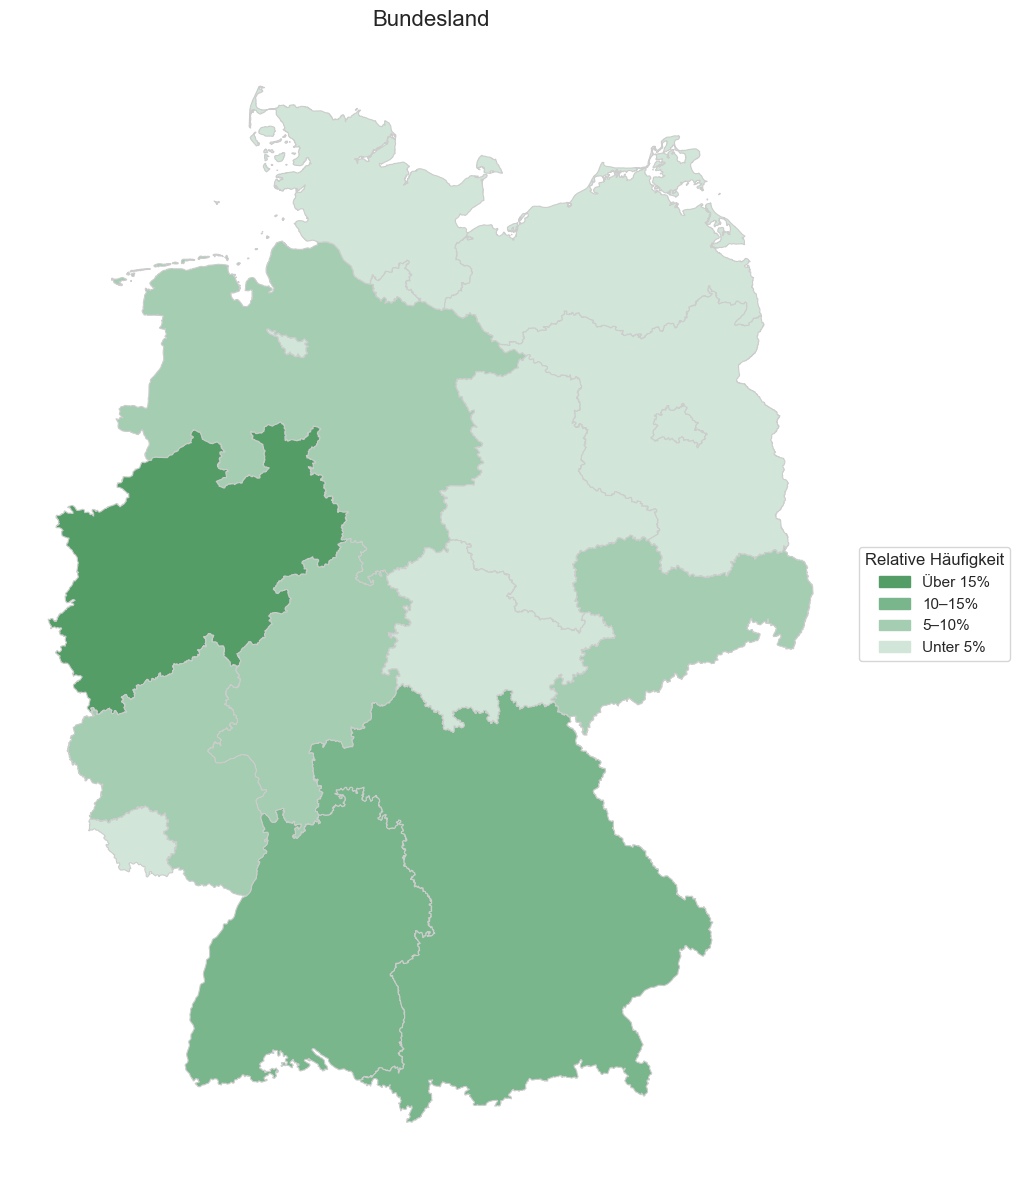

In [239]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

#  relativen Häufigkeiten pro Bundesland
df_cleaned = {
    'Bundesland': [
        'Nordrhein-Westfalen', 'Bayern', 'Baden-Württemberg', 'Niedersachsen',
        'Hessen', 'Sachsen', 'Rheinland-Pfalz', 'Schleswig-Holstein', 'Berlin',
        'Thüringen', 'Brandenburg', 'Sachsen-Anhalt', 'Hamburg',
        'Mecklenburg-Vorpommern', 'Bremen', 'Saarland'
    ],
    'relative_Häufigkeit': [
        24.60, 13.00, 11.90, 9.13, 7.84, 5.56, 5.26, 4.27, 3.77,
        3.08, 2.78, 2.58, 2.38, 1.69, 1.39, 0.79
    ]
}

df_deutschlandkarte = pd.DataFrame(df_cleaned)

# Farbcodierung auf Basis der Gruppen
def farbgruppe(häufigkeit):
    if häufigkeit > 15:
        return '#549D67'  # Gruppe 1
    elif 10 < häufigkeit <= 15:
        return '#7AB68C'  # Gruppe 2
    elif 5 <= häufigkeit <= 10:
        return '#A4CDB2'  # Gruppe 3
    else:
        return '#D1E6D9'  # Gruppe 4

df_deutschlandkarte['farbe'] = df_deutschlandkarte['relative_Häufigkeit'].apply(farbgruppe)

# Beispiel: GeoJSON der deutschen Bundesländer von einer öffentlichen Quelle
url = "https://raw.githubusercontent.com/isellsoap/deutschlandGeoJSON/main/2_bundeslaender/2_hoch.geo.json"
bundeslaender = gpd.read_file(url)

# Mergen mit Häufigkeiten
merged = bundeslaender.merge(df_deutschlandkarte, left_on='name', right_on='Bundesland')

# Plot erstellen
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
merged.plot(color=merged['farbe'], linewidth=0.8, edgecolor='0.8', ax=ax)

# Titel
ax.set_title("Bundesland", fontsize=16)
ax.axis('off')

# Legende manuell erstellen
import matplotlib.patches as mpatches
legende = [
    mpatches.Patch(color='#549D67', label='Über 15%'),
    mpatches.Patch(color='#7AB68C', label='10–15%'),
    mpatches.Patch(color='#A4CDB2', label='5–10%'),
    mpatches.Patch(color='#D1E6D9', label='Unter 5%')
]
ax.legend(handles=legende, title='Relative Häufigkeit', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()



In [240]:
# Gemeindegröße - wird in der Präsentation nicht reportet

# Absolute Häufigkeit
print("Absolute Häufigkeit (S8):")
print(df_renamed["S8"].value_counts(dropna=False))

# Relative Häufigkeit
print("\nRelative Häufigkeit (S8:")
print(df_renamed["S8"].value_counts(normalize=True, dropna=False).round(3)) 



Absolute Häufigkeit (S8):
S8
5.000 bis unter 20.000 Einwohner       201
500.000 oder mehr Einwohner            189
100.000 bis unter 500.000 Einwohner    174
Weniger als 5.000 Einwohner            159
20.000 bis unter 50.000 Einwohner      151
50.000 bis unter 100.000 Einwohner     103
Weiß nicht                              31
Name: count, dtype: int64

Relative Häufigkeit (S8:
S8
5.000 bis unter 20.000 Einwohner       0.199
500.000 oder mehr Einwohner            0.188
100.000 bis unter 500.000 Einwohner    0.173
Weniger als 5.000 Einwohner            0.158
20.000 bis unter 50.000 Einwohner      0.150
50.000 bis unter 100.000 Einwohner     0.102
Weiß nicht                             0.031
Name: proportion, dtype: float64


In [241]:
# Haushaltseinkommen - wird in der Präsentation nicht reportet

# Absolute Häufigkeit
print("Absolute Häufigkeit (S9):")
print(df_renamed["S9"].value_counts(dropna=False))

# Relative Häufigkeit
print("\nRelative Häufigkeit (S9:")
print(df_renamed["S9"].value_counts(normalize=True, dropna=False).round(3)) 

Absolute Häufigkeit (S9):
S9
Keine Angabe                  200
750 bis unter 1.500 EURO      137
3.000 bis unter 4.000 EURO    131
2.500 bis unter 3.000 EURO    122
2.000 bis unter 2.500 EURO    111
1.500 bis unter 2.000 EURO    111
4.000 bis unter 5.000 EURO     94
5.000 EURO und mehr            66
450 bis unter 750 EURO         22
Bis unter 450 EURO             14
Name: count, dtype: int64

Relative Häufigkeit (S9:
S9
Keine Angabe                  0.198
750 bis unter 1.500 EURO      0.136
3.000 bis unter 4.000 EURO    0.130
2.500 bis unter 3.000 EURO    0.121
2.000 bis unter 2.500 EURO    0.110
1.500 bis unter 2.000 EURO    0.110
4.000 bis unter 5.000 EURO    0.093
5.000 EURO und mehr           0.065
450 bis unter 750 EURO        0.022
Bis unter 450 EURO            0.014
Name: proportion, dtype: float64


In [247]:
# Plattformen - Relative Häufigkeiten
plattformen = [
    "Facebook", "Instagram", "Twitter", "YouTube", "Google+", "LinkedIn", "Xing",
    "Tumblr", "Reddit", "Snapchat", "WhatsApp"
]

# Ergebnisse sammeln
ergebnisse = []

# Für jede Plattform: relative Häufigkeit der "1" (ausgewählt)
for i, plattform in enumerate(plattformen, 1):
    var = f"SC2_{i}"
    if var in df_renamed.columns:
        rel_freq = df_renamed[var].value_counts(normalize=True, dropna=True) * 100
        freq_1 = round(rel_freq.get(1, 0), 1)  # Nur Wert für Antwort "1"
        ergebnisse.append((plattform, freq_1))

# DataFrame erstellen
result = pd.DataFrame(ergebnisse, columns=["Plattform", "Relative Häufigkeiten (%)"])

# Absteigend sortieren
result = result.sort_values(by="Relative Häufigkeiten (%)", ascending=False).reset_index(drop=True)

# Spaltenüberschriften einfärben
result.columns = [f'<span style="color:#549D67"><b>{col}</b></span>' for col in result.columns]

# Anzeige als HTML-Tabelle
from IPython.display import display, HTML
display(HTML(result.to_html(escape=False, index=False)))

  

Plattform,Relative Häufigkeiten (%)
WhatsApp,85.6
Facebook,84.6
YouTube,45.9
Instagram,42.0
Google+,16.0
Twitter,15.2
Snapchat,12.1
Xing,7.7
LinkedIn,4.8
Tumblr,2.8


In [249]:
# A2 (Warum werden soziale Netzwerke genutzt?)

# Relative Häufigkeit in Prozent
print("\nRelative Häufigkeit (A2_3):")
print((df_renamed["A2_3"].value_counts(normalize=True, dropna=False) * 100).round(1))

print("\nRelative Häufigkeit (A2_5):")
print((df_renamed["A2_5"].value_counts(normalize=True, dropna=False) * 100).round(1))



Relative Häufigkeit (A2_3):
A2_3
2.0    44.2
1.0    26.8
3.0    19.9
4.0     8.6
NaN     0.4
Name: proportion, dtype: float64

Relative Häufigkeit (A2_5):
A2_5
4.0    44.2
3.0    33.8
2.0    16.3
1.0     4.5
NaN     1.2
Name: proportion, dtype: float64


In [ ]:
#Politisches Interesse

mean_b4 = df_renamed["B4"].mean()
std_b4 = df_renamed["B4"].std()
print(f"Mittelwert (B4): {mean_b4:.2f}")
print(f"Standardabweichung (B4): {std_b4:.2f}")

Mittelwert (B4): 3.19
Standardabweichung (B4): 1.47


In [253]:
#Touchpoints Politik

mean_touchpoint = df_renamed["B5_3"].mean()
std_touchpoint = df_renamed["B5_3"].std()
print(f"Mittelwert (B5_3): {mean_touchpoint:.2f}")
print(f"Standardabweichung (B5_5): {std_touchpoint:.2f}")

Mittelwert (B5_3): 2.22
Standardabweichung (B5_5): 0.81


In [ ]:
#Touchpoints Politik

mean_touchpoint = df_renamed["B5_3"].mean()
std_touchpoint = df_renamed["B5_3"].std()
print(f"Mittelwert (B5_3): {mean_touchpoint:.2f}")
print(f"Standardabweichung (B5_5): {std_touchpoint:.2f}")

In [254]:
#Mediennutzung für Politik

mean_politmediennutzung = df_renamed["B6_7"].mean()
std_politmediennutzung = df_renamed["B6_7"].std()
print(f"Mittelwert (B6_7): {mean_politmediennutzung:.2f}")
print(f"Standardabweichung (B6_7): {std_politmediennutzung:.2f}")

Mittelwert (B6_7): 2.32
Standardabweichung (B6_7): 0.99
